Cluster analysis seeks to group the data, in order to minimize within-group dissimilarities and maximize between-group dissimilaries.

In [114]:
# read the dataset
players.trans <- read.csv("/Users/alessia/Desktop/Statistics/players.trans.csv", header = TRUE)

Preprocessing of the variables has already taken place in the exploratory and preprocessing step. However, the variable Salary wasn't transformed through Box-Cox transformations, and thus has a very different scale from other variables. Since this would affect the analysis too much, we apply a simple log transformation to the variable.

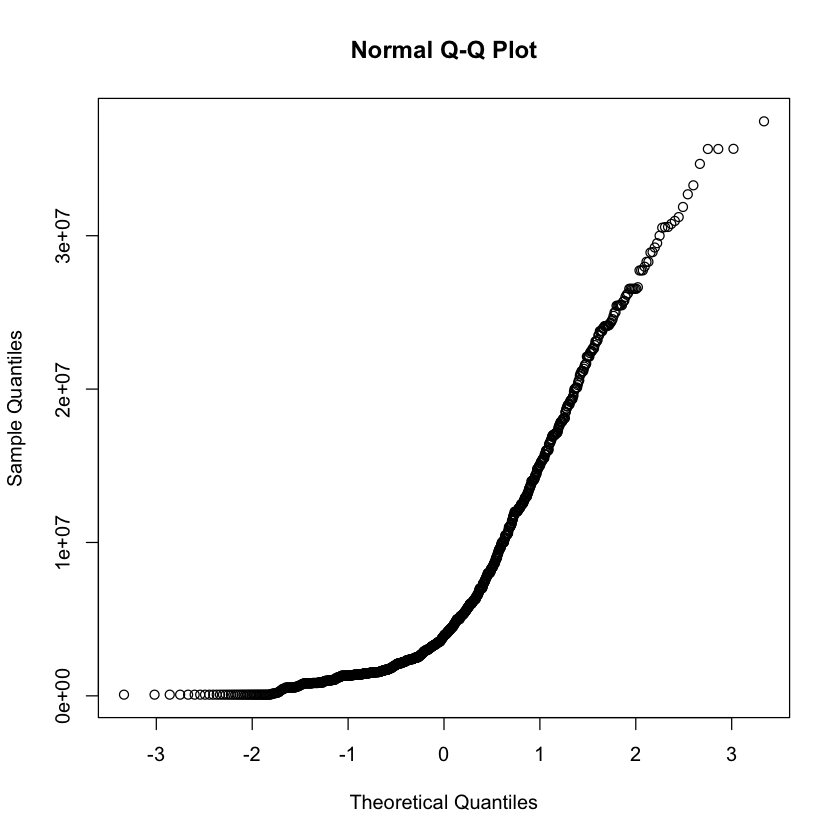

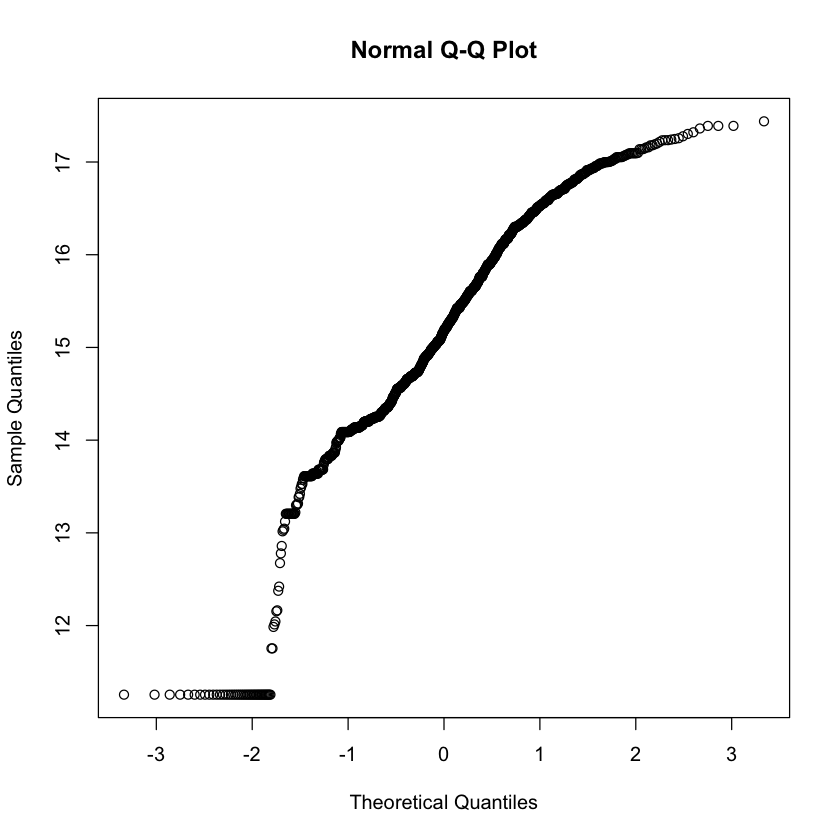

In [115]:
# since the scale of Salary would affect the cluster analysis too much, take the log of Salary
# all other variables have been transformed
qqnorm(players.trans$Salary)
qqnorm(log(players.trans$Salary))
players.trans$Salary <- log(players.trans$Salary)

In [116]:
# remove categorical variables
players.continuous <- players.trans[-c(1, 2, 3, 4)]

We start by grouping instances through partitioning methods for cluster analysis: k-means and k-medoids on instances. Since the result of the analysis may change a lot due to the scale of the variables, both algorithms are run both with scaled and non-scaled data. Scaling variables yields overall worse silhouette values than running the same algorithm on non-scaled data.

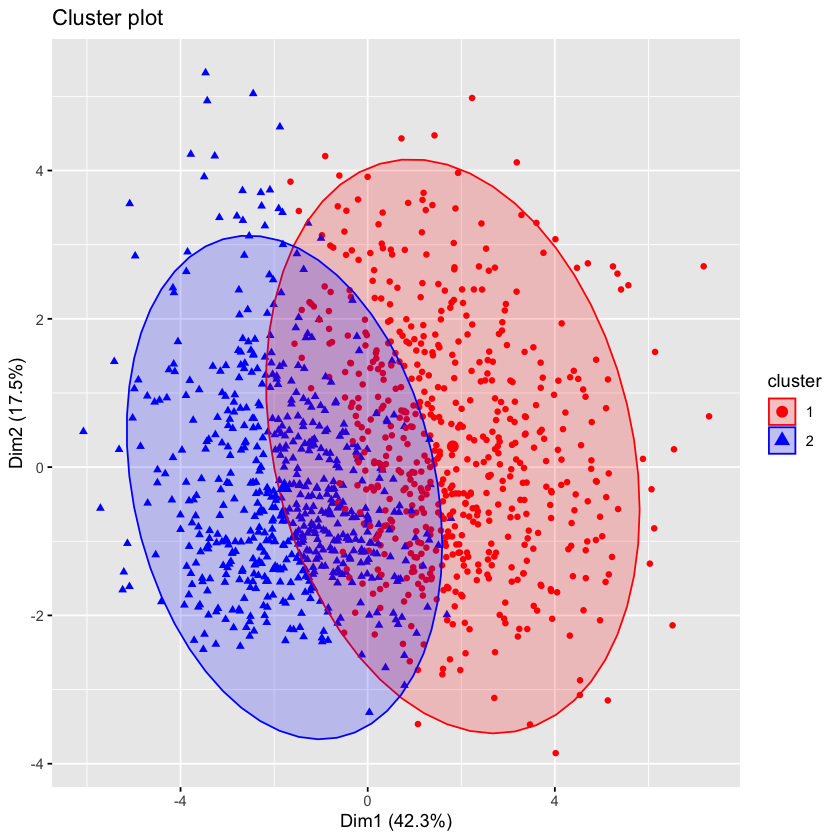

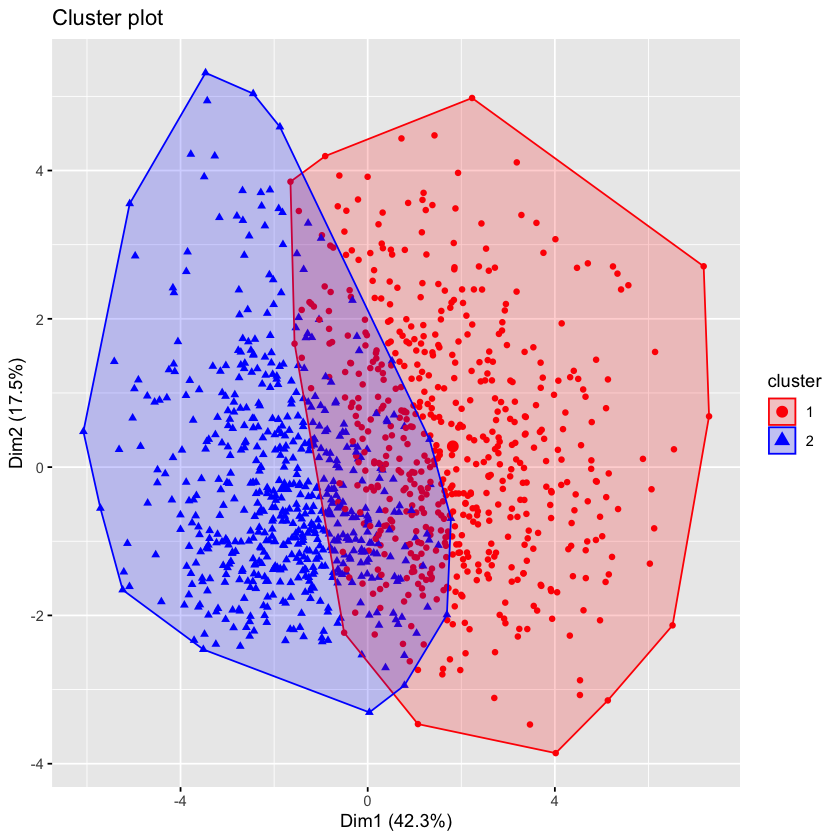

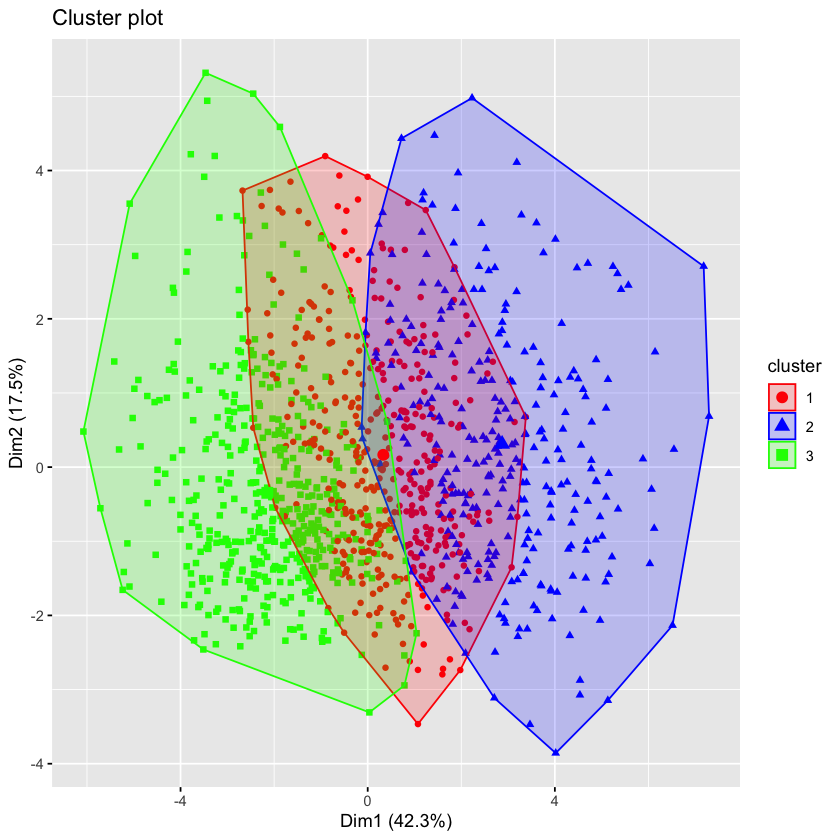

In [117]:
# cluster observations with k-means (non scaled data)
library(cluster)
set.seed(190)
kmeans.2 <- kmeans(players.continuous, 2, nstart = 50) # partition data in 2 groups
library(factoextra)
fviz_cluster(kmeans.2, geom = "point", ellipse.type = "norm", data = players.continuous, palette = c("red", "blue"))
fviz_cluster(kmeans.2, geom = "point", data = players.continuous, palette = c("red", "blue"))
kmeans.3 <- kmeans(players.continuous, 3, nstart = 50) # partition data in 3 groups
fviz_cluster(kmeans.3, geom = "point", data = players.continuous, palette = c("red", "blue", 'green'))

In [118]:
kmeans.4 <- kmeans(players.continuous, 4, nstart = 50) # 4 groups
kmeans.5 <- kmeans(players.continuous, 5, nstart = 50) # 5 groups
kmeans.6 <- kmeans(players.continuous, 6, nstart = 50) # 6 groups

In [119]:
# look at the size of clusters
kmeans.2$size
kmeans.3$size
kmeans.4$size
kmeans.5$size
kmeans.6$size

[1] 584 597

[1] 413 301 467

[1] 279 325 218 359

[1] 154 253 256 262 256

[1] 188 123 199 190 236 245

The optimal number of clusters can be chosen by looking at the average silhouette value by number of groups.

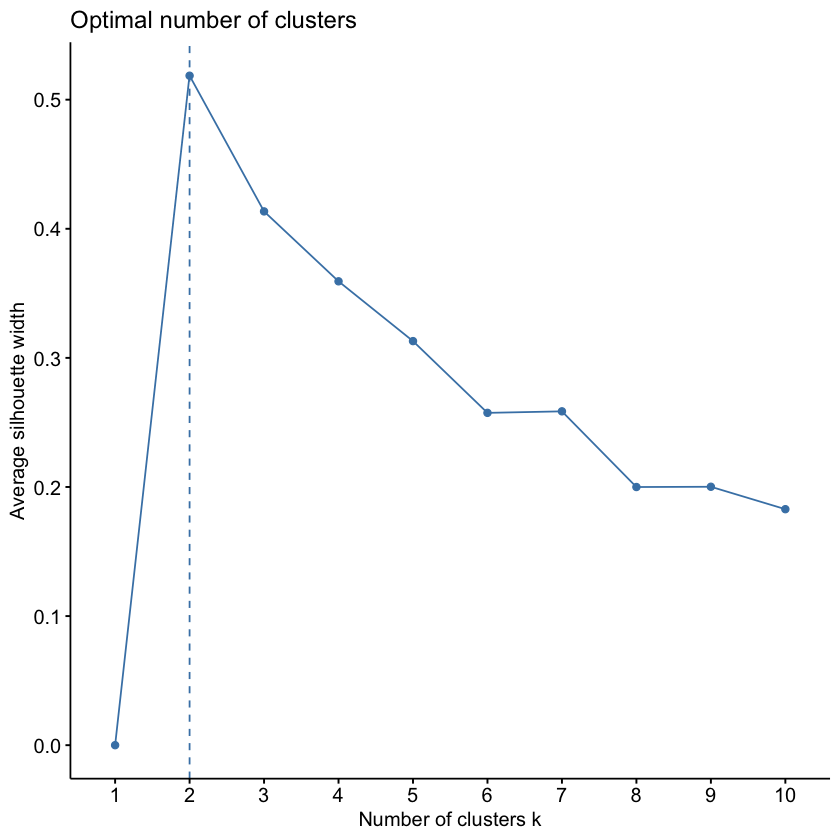

In [120]:
# silhouette values for number of clusters
fviz_nbclust(players.continuous,kmeans,method='silhouette')

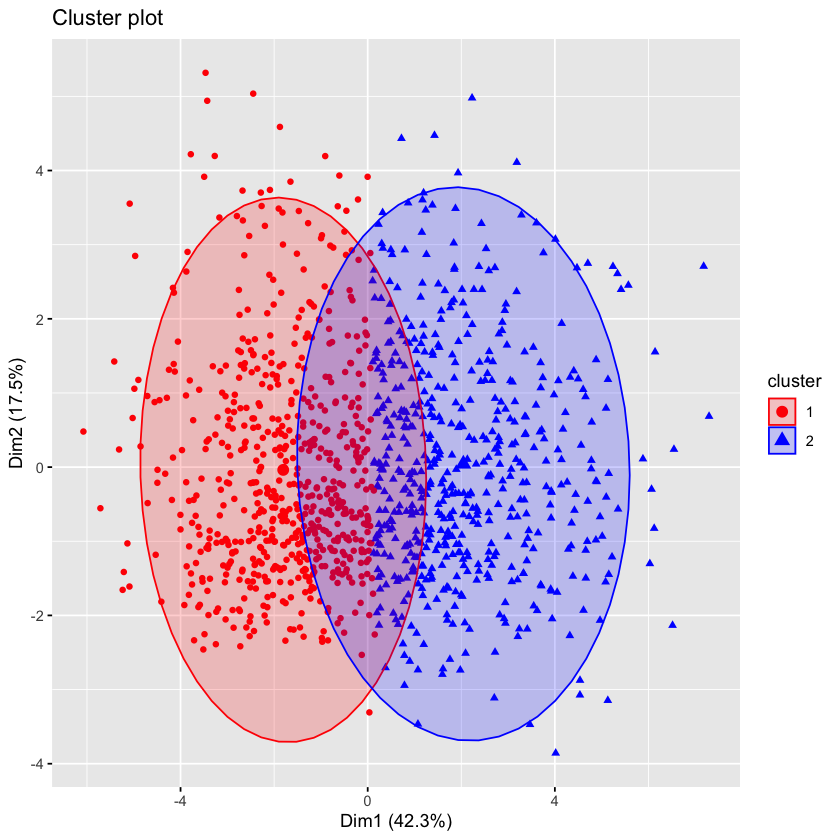

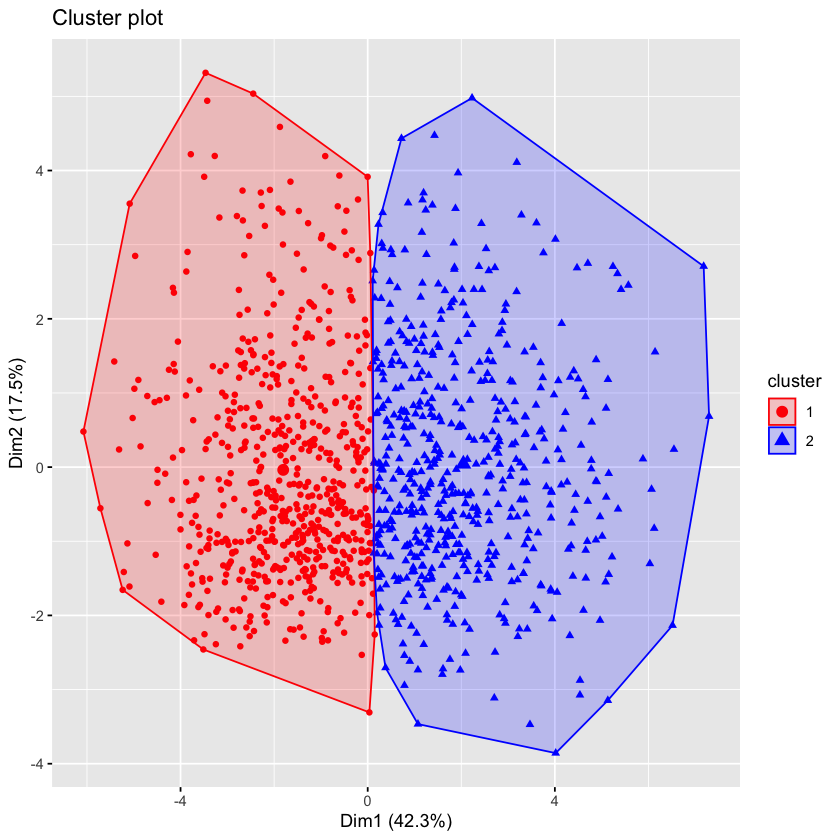

In [121]:
# k-means (standardized data)
players.scaled <- scale(players.continuous, center = T, scale = T)
set.seed(10)
kmeans.2.scaled <- kmeans(players.scaled, 2, nstart = 50)
fviz_cluster(kmeans.2.scaled, geom = "point", ellipse.type = "norm", data = players.continuous, palette = c("red", "blue"))
fviz_cluster(kmeans.2.scaled, geom = "point", data = players.continuous, palette = c("red", "blue"))
kmeans.3.scaled <- kmeans(players.scaled, 3, nstart = 50)
kmeans.4.scaled <- kmeans(players.scaled, 4, nstart = 50)
kmeans.5.scaled <- kmeans(players.scaled, 5, nstart = 50)
kmeans.6.scaled <- kmeans(players.scaled, 6, nstart = 50)

In [122]:
# look at the size of clusters
kmeans.2.scaled$size
kmeans.3.scaled$size
kmeans.4.scaled$size
kmeans.5.scaled$size
kmeans.6.scaled$size

[1] 627 554

[1] 535 392 254

[1] 399 192 376 214

[1] 305 386  77 204 209

[1] 300  74 199 166 274 168

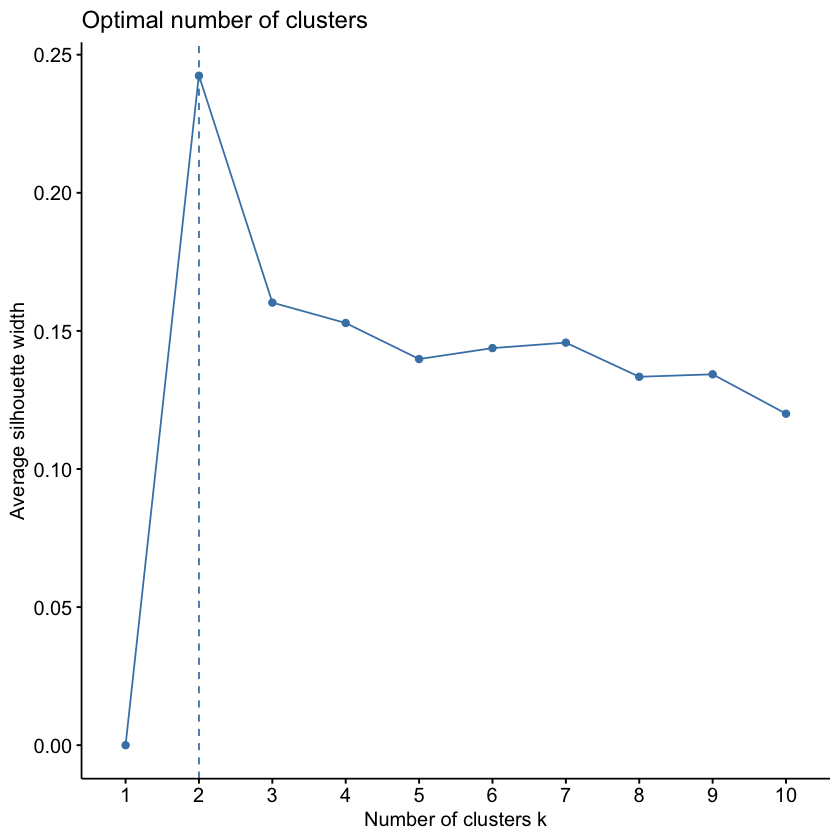

In [123]:
fviz_nbclust(players.scaled,kmeans,method='silhouette')
# silhouette values are worse
# the optimal cluster number is 2 in both cases

Warning message in plot.window(...):
“parametro grafico "show.clusters" non valido”
Warning message in plot.xy(xy, type, ...):
“parametro grafico "show.clusters" non valido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“parametro grafico "show.clusters" non valido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“parametro grafico "show.clusters" non valido”
Warning message in box(...):
“parametro grafico "show.clusters" non valido”
Warning message in title(...):
“parametro grafico "show.clusters" non valido”
Warning message in polygon(z[[i]], density = if (shade) density[i] else 0, col = col.clus, :
“parametro grafico "show.clusters" non valido”
Warning message in polygon(z[[i]], density = if (shade) density[i] else 0, col = col.clus, :
“parametro grafico "show.clusters" non valido”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“parametro grafico "show.clusters" non valido”
Warning message in plot.xy(xy.coords(x, y), type =

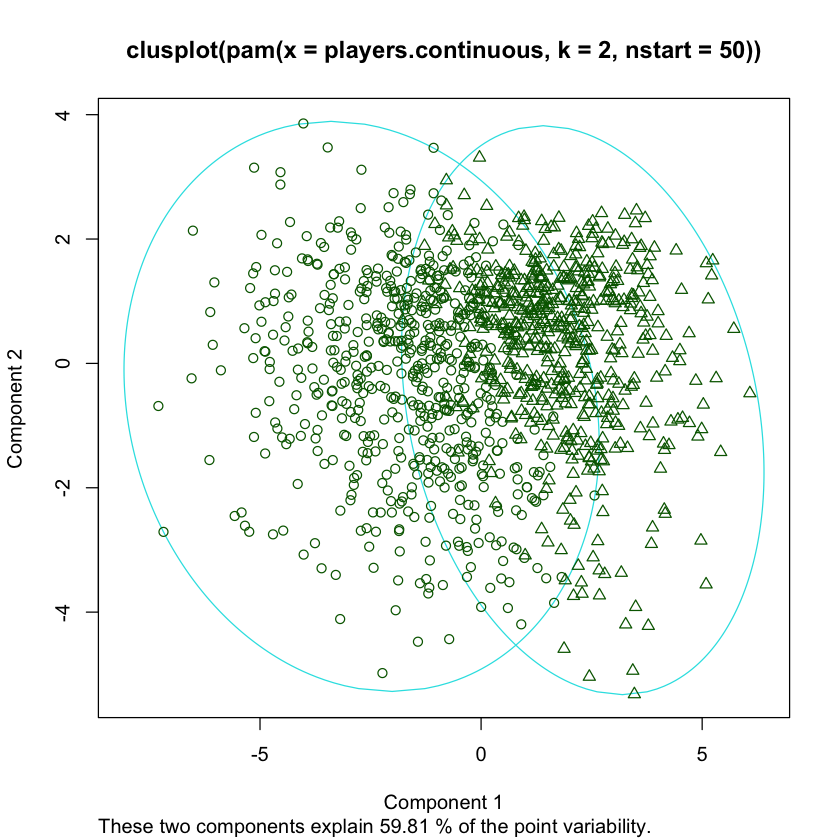

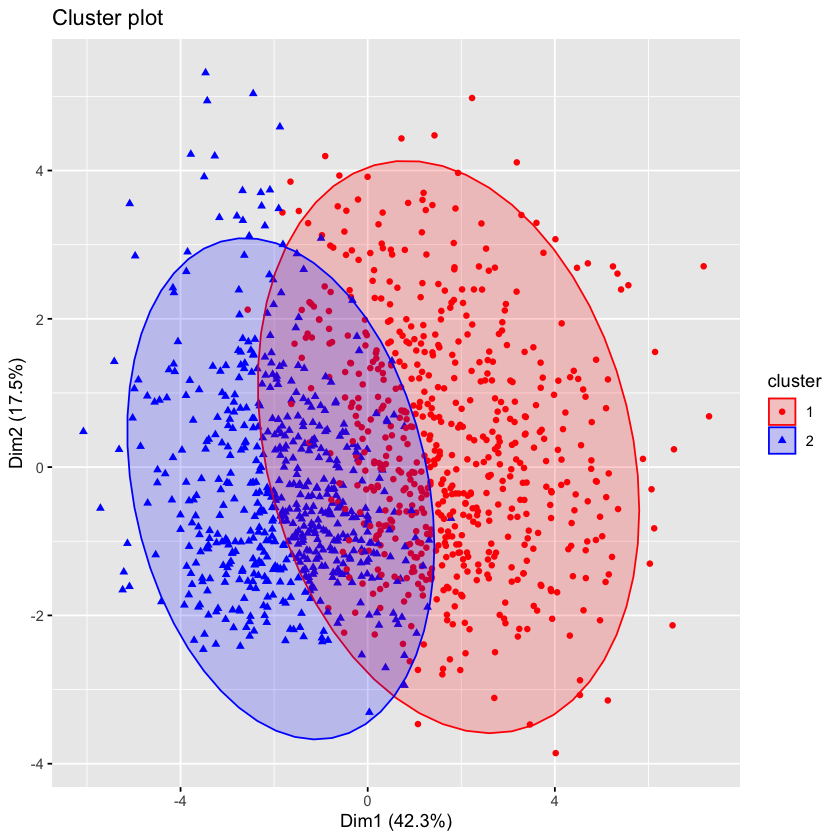

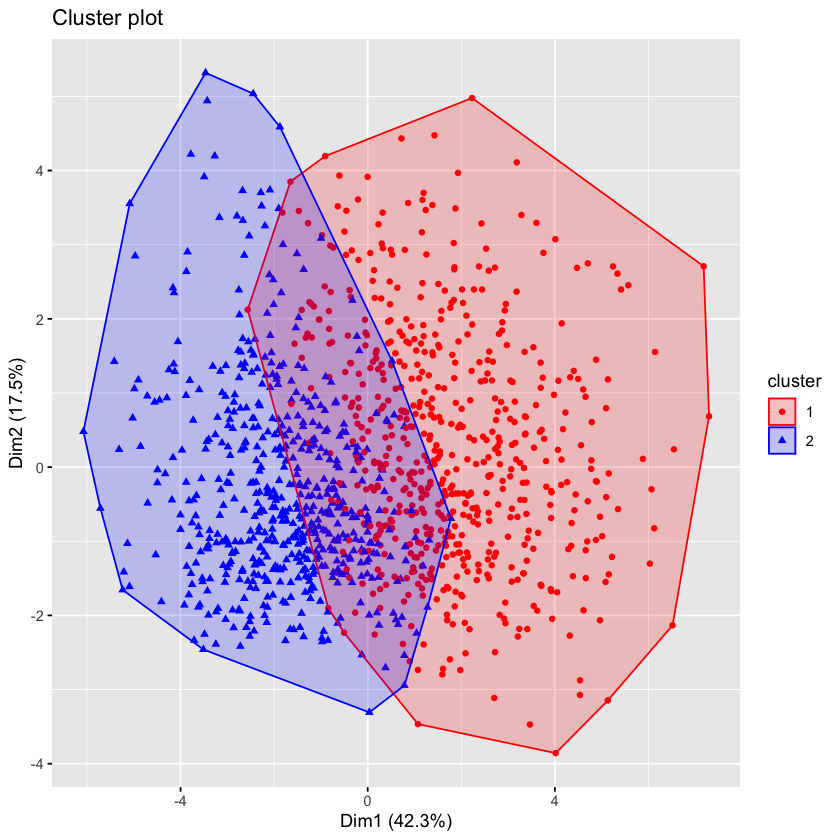

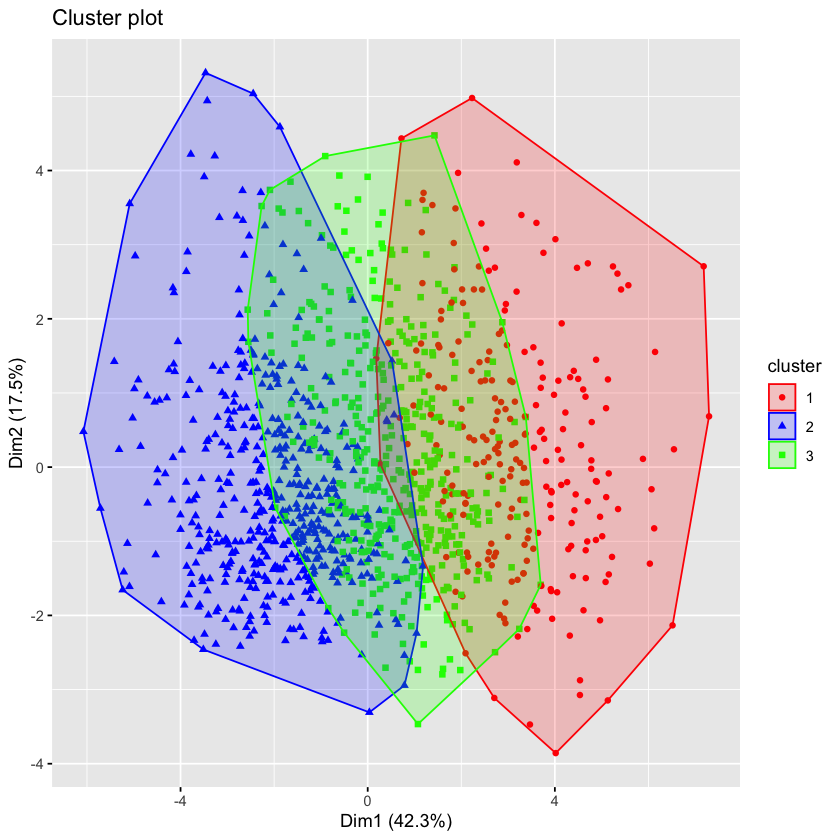

In [124]:
# k-medoids (non standardized)
kmed.2 <- pam(players.continuous, k = 2, nstart = 50)
plot(kmed.2, which.plot = 1, show.clusters = TRUE)
fviz_cluster(kmed.2, geom = "point", ellipse.type = "norm", data = players.continuous, palette = c("red", "blue"))
fviz_cluster(kmed.2, geom = "point", data = players.continuous, palette = c("red", "blue"))
kmed.3 <- pam(players.continuous, k = 3, nstart = 50)
fviz_cluster(kmed.3, geom = "point", data = players.continuous, palette = c("red", "blue", 'green'))

Warning message in plot.window(...):
“parametro grafico "show.clusters" non valido”
Warning message in plot.xy(xy, type, ...):
“parametro grafico "show.clusters" non valido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“parametro grafico "show.clusters" non valido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“parametro grafico "show.clusters" non valido”
Warning message in box(...):
“parametro grafico "show.clusters" non valido”
Warning message in title(...):
“parametro grafico "show.clusters" non valido”
Warning message in polygon(z[[i]], density = if (shade) density[i] else 0, col = col.clus, :
“parametro grafico "show.clusters" non valido”
Warning message in polygon(z[[i]], density = if (shade) density[i] else 0, col = col.clus, :
“parametro grafico "show.clusters" non valido”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“parametro grafico "show.clusters" non valido”
Warning message in plot.xy(xy.coords(x, y), type =

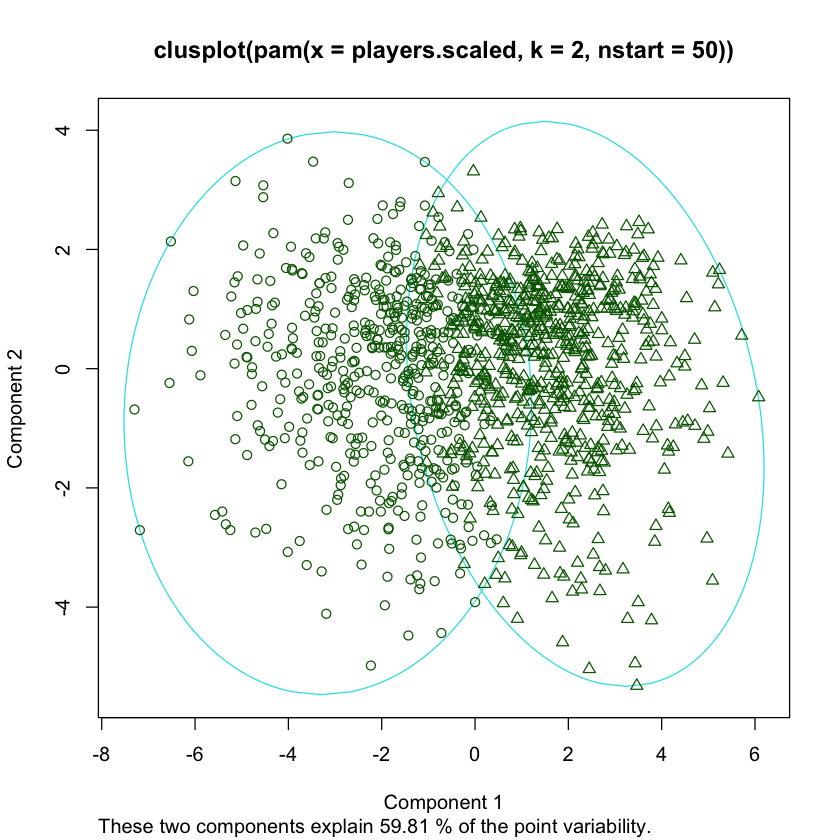

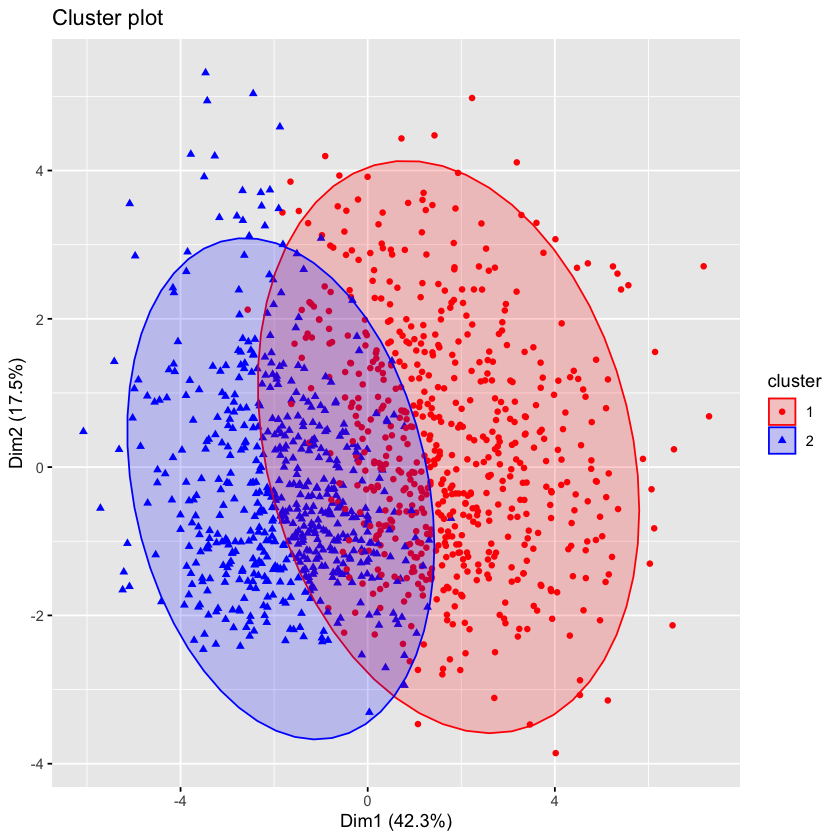

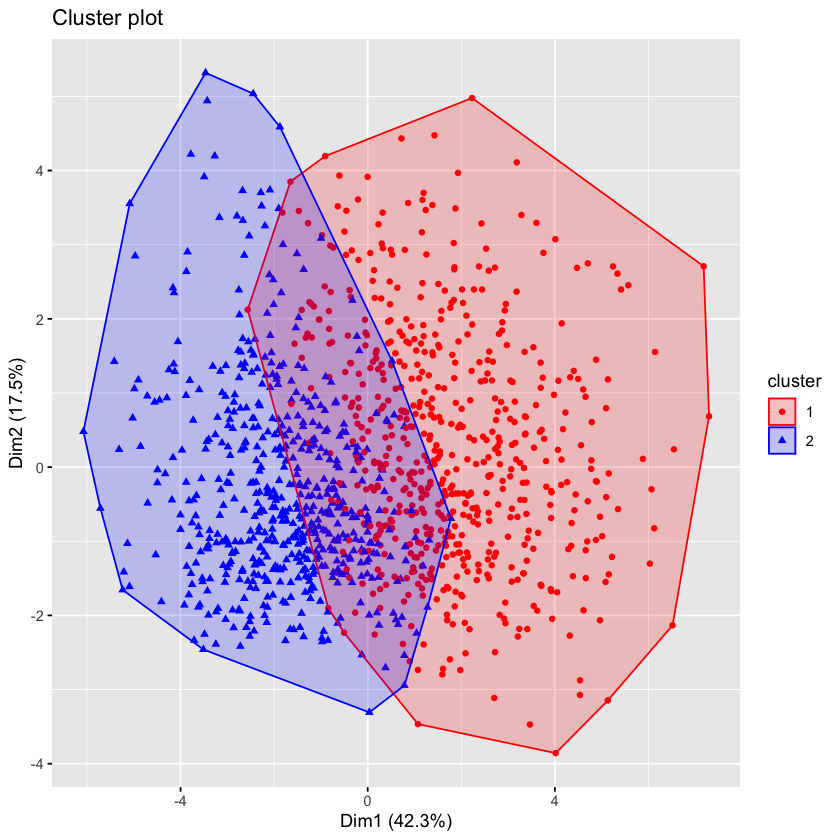

In [125]:
# k-medoids (standardized)
kmed.2.scaled <- pam(players.scaled, k = 2, nstart = 50)
plot(kmed.2.scaled, which.plot = 1, show.clusters = TRUE)
fviz_cluster(kmed.2, geom = "point", ellipse.type = "norm", data = players.scaled, palette = c("red", "blue"))
fviz_cluster(kmed.2, geom = "point", data = players.scaled, palette = c("red", "blue"))

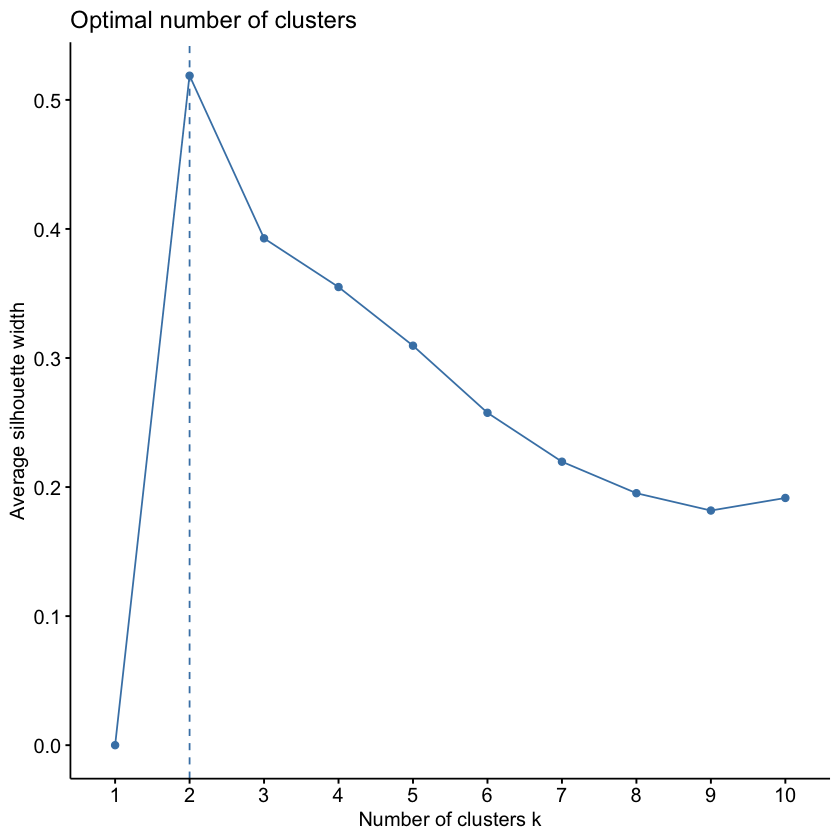

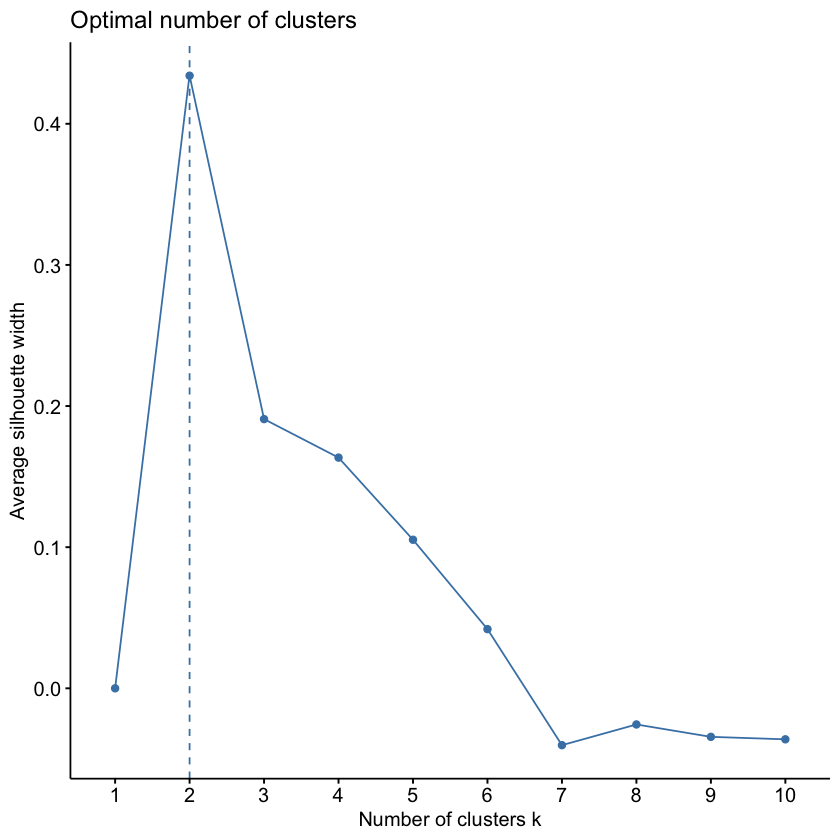

In [126]:
fviz_nbclust(players.continuous,cluster::pam,method='silhouette') # silhouette values for non-standardized clustering
fviz_nbclust(players.continuous,cluster::pam,method='silhouette', stand = T) # silhouette values for standardized
# standardizing the observations yields worse clustering results according to the silhouette values

In [127]:
# k-means
cluster_assignments <- kmeans.2$cluster
silhouette_values <- silhouette(cluster_assignments, dist(players.continuous))
cat("For k =", 2, ", average silhouette score of k-means is", mean(silhouette_values[, "sil_width"]), "\n")

For k = 2 , average silhouette score of k-means is 0.5185631 


In [128]:
# k-means scaled
cluster_assignments <- kmeans.2.scaled$cluster
silhouette_values <- silhouette(cluster_assignments, dist(players.scaled))
cat("For k =", 2, ", average silhouette score of k-means is", mean(silhouette_values[, "sil_width"]), "\n")

For k = 2 , average silhouette score of k-means is 0.2423929 


In [129]:
# k-medoids
cluster_assignments <- kmed.2$cluster
silhouette_values <- silhouette(cluster_assignments, dist(players.continuous))
cat("For k =", 2, ", average silhouette score of k-med is", mean(silhouette_values[, "sil_width"]), "\n")

For k = 2 , average silhouette score of k-med is 0.5187293 


  cluster size ave.sil.width
1       1  612          0.48
2       2  569          0.56


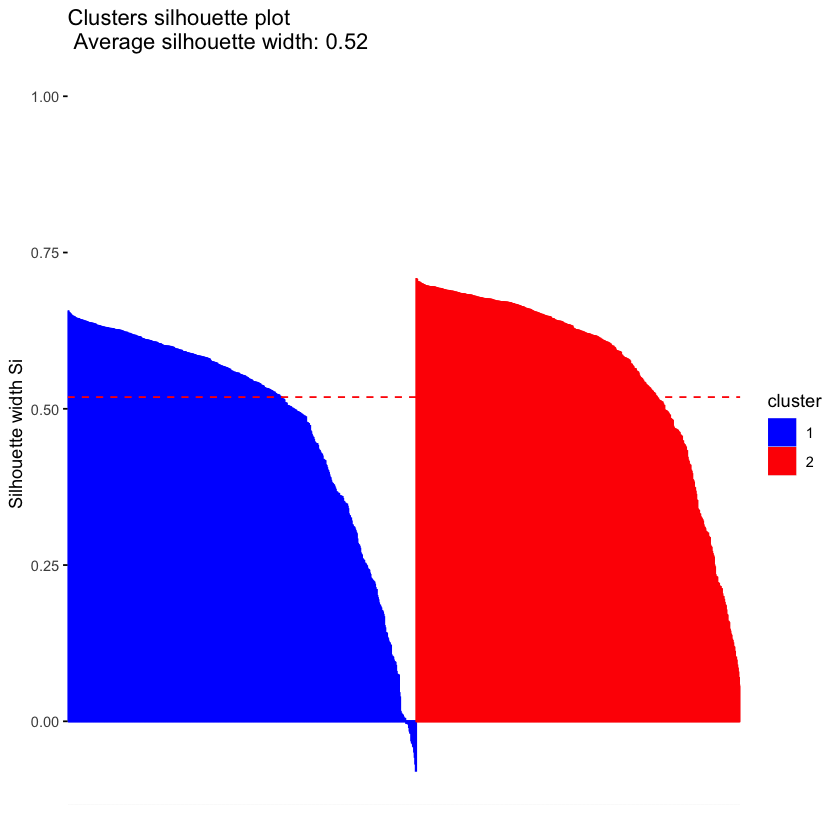

In [130]:
colors <- c('blue', 'red')
fviz_silhouette(kmed.2, palette = colors) # visualize silhouette
# The average silhouette value of both methods is almost the same. I'm going to proceed with k-medoids

In [131]:
# k-medoids scaled
cluster_assignments <- kmed.2.scaled$cluster
silhouette_values <- silhouette(cluster_assignments, dist(players.scaled))
cat("For k =", 2, ", average silhouette score of k-med is", mean(silhouette_values[, "sil_width"]), "\n")

For k = 2 , average silhouette score of k-med is 0.2375547 


For partitioning methods, the silhouette score of k-medoids and k-means is almost equal, although slightly higher for k-medoids. Scaling the data yields overall worse silhouette values, therefore, we're going to proceed with k-medoids non-scaled, with two cluster groups.

We visualize clusters according to categorical variables Role, Play and Pos1.

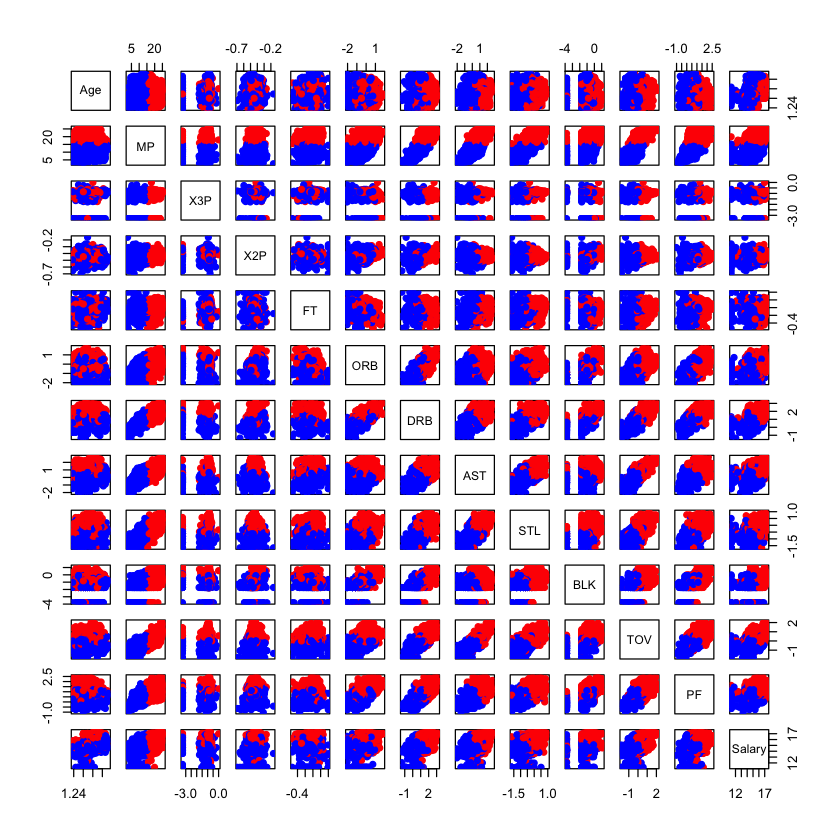

In [132]:
# plot clusters
plot(players.continuous, col = colors[kmeans.2$cluster], pch =19)
# two cluster groups depend heavily on Salary, MP and Age, due to the difference in scale

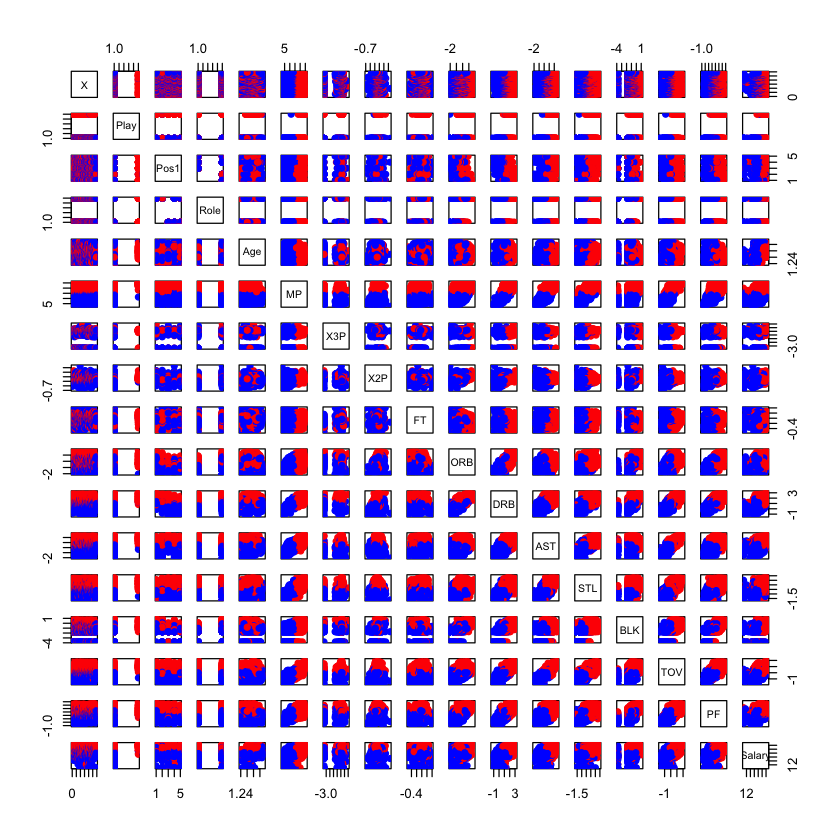

In [133]:
# plot clusters on categorical data
plot(players.trans, col = colors[kmeans.2$cluster], pch =19)
# the variable Play is partially represented by the clustering solution

In [134]:
# check with confusion matrix
table(players.trans$Play, kmeans.2$cluster)
table(players.trans$Role, kmeans.2$cluster)
table(players.trans$Pos1, kmeans.2$cluster)

     
        1   2
  No  583 525
  Yes   1  72

       
          1   2
  Back  259 293
  Front 325 304

    
       1   2
  C  109  89
  PF 132 120
  PG 112 131
  SF 102 101
  SG 129 156

By looking at the confusion matrix for each cluster group, according to each categorical variable, we can see that the categorical variable Play partitions the instances similarly to the cluster groups. On the other hand, the levels of Pos1 and Role don't agree  with the clustering of the instances.

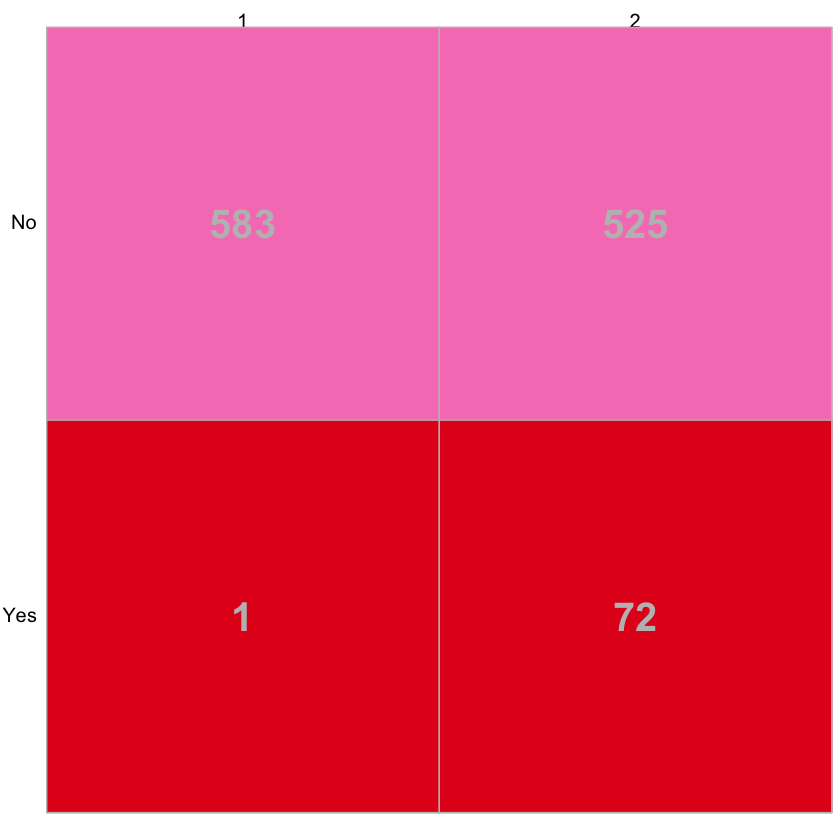

In [135]:
# corrplot for Play
library(corrplot)
library(RColorBrewer)
corrplot(table(players.trans$Play, kmeans.2$cluster), col = brewer.pal(8, 'Set1'), is.corr = F, method = 'color', tl.srt = 0, tl.col = 'black', addgrid.col = 'grey', addCoef.col = 'grey', number.cex = 2, cl.pos = 'n')

Once again, Play nicely separates the two groups of variables.

By looking at the Rand Index, the two partitioning methods (k-means and k-medoids) strongly agree on the partitioning of the instances.

In [136]:
install.packages('fossil')
library(fossil)
# Rand Index
rand.index(kmeans.2$cluster, kmed.2$cluster)

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto



[1] 0.9536675

We run now hierarchical cluster analysis on the instances: agglomerative clustering (with average, single and complete linkage) and divisive analysis. We can judge the clustering of the instances based on silhouette values and divisive coefficients.

For k = 2 , average silhouette score of divisive analysis is 0.5185097 


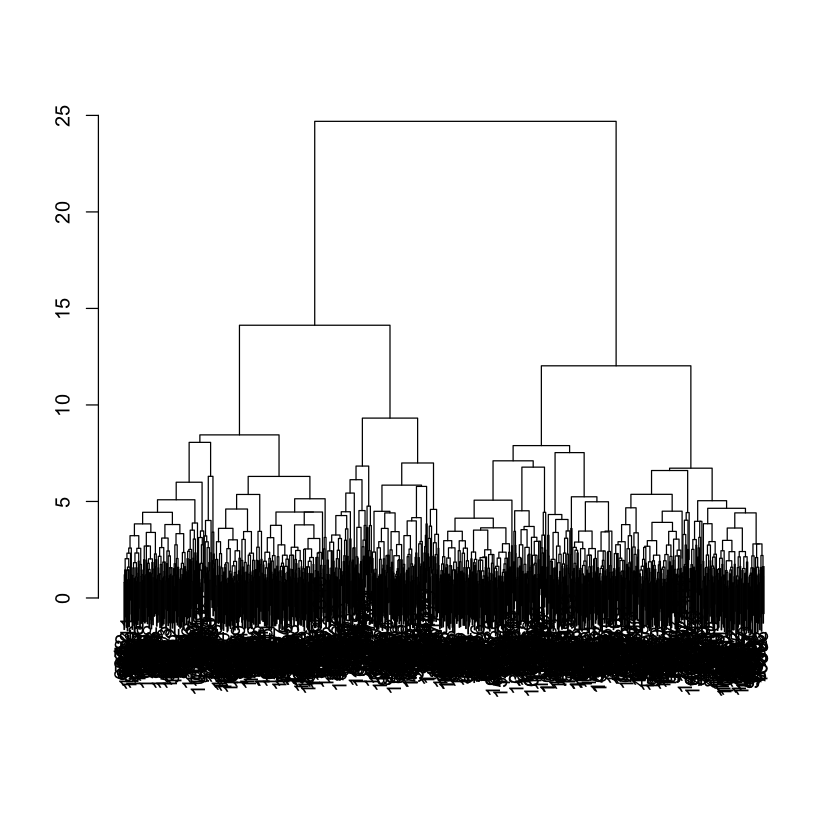

In [137]:
library(dendextend)
set.seed(106)
# divisive analysis with average linkage
X.diana <- diana(players.continuous, stand = F)
plot(X.diana,which.plots=2, ann = FALSE)
X.diana.cluster.2 <- cutree(X.diana,k=2)
silhouette_values <- silhouette(X.diana.cluster.2, dist(players.continuous)) 
cat("For k =", 2, ", average silhouette score of divisive analysis is", mean(silhouette_values[, "sil_width"]), "\n")

In [138]:
table(X.diana.cluster.2) # confusion matrix

X.diana.cluster.2
  1   2 
582 599 

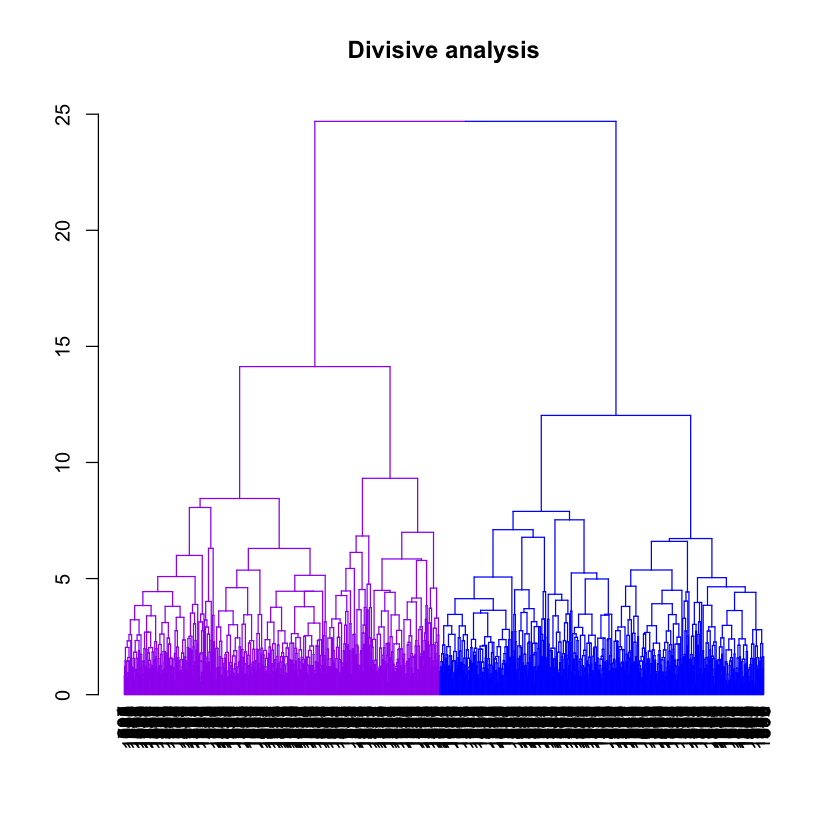

In [139]:
# color dendogram by group
colors <- c('purple', 'blue')
X.diana.dg <- as.dendrogram(X.diana)
X.diana.color <- color_branches(X.diana.dg, k = 2, col = colors)
plot(X.diana.color, main = 'Divisive analysis', cex = c(0,0))

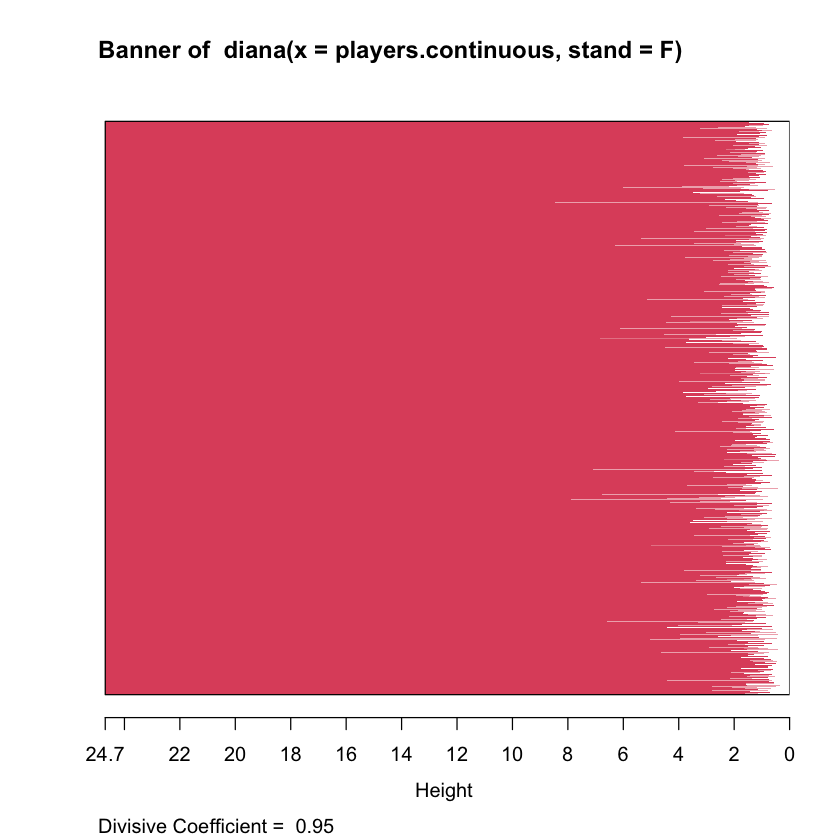

In [140]:
# visualize banner plot and divisive coefficient
plot(X.diana, which.plots = 1)

In [141]:
X.diana.cluster <- cutree(X.diana,k=3) # dendogram with 3 groups
table(X.diana.cluster)
silhouette_values <- silhouette(X.diana.cluster, dist(players.continuous)) 
cat("For k =", 3, ", average silhouette score of divisive analysis is", mean(silhouette_values[, "sil_width"]), "\n")

X.diana.cluster
  1   2   3 
374 599 208 

For k = 3 , average silhouette score of divisive analysis is 0.4083984 


In [142]:
X.diana.cluster <- cutree(X.diana,k=4) # dendogram with 4 groups
table(X.diana.cluster)
silhouette_values <- silhouette(X.diana.cluster, dist(players.continuous)) 
cat("For k =", 4, ", average silhouette score of divisive analysis is", mean(silhouette_values[, "sil_width"]), "\n")

X.diana.cluster
  1   2   3   4 
374 319 208 280 

For k = 4 , average silhouette score of divisive analysis is 0.3598388 


In [143]:
X.diana.cluster.5 <- cutree(X.diana,k=5) # dendogram with 5 groups
table(X.diana.cluster)
silhouette_values <- silhouette(X.diana.cluster.5, dist(players.continuous)) 
cat("For k =", 5, ", average silhouette score of divisive analysis is", mean(silhouette_values[, "sil_width"]), "\n")
# According to the silhouette values, 2 clusters is the best choice

X.diana.cluster
  1   2   3   4 
374 319 208 280 

For k = 5 , average silhouette score of divisive analysis is 0.3109628 


By plotting confusion matrices by clustering groups and categorical variables, once again the levels of the variable Play partition the variables similarly to the hierarchical cluster methods.

     X.diana.cluster.2
        1   2
  No  581 527
  Yes   1  72

       X.diana.cluster.2
          1   2
  Back  258 294
  Front 324 305

    X.diana.cluster.5
      1  2  3  4  5
  C  76 52  9 37 24
  PF 80 70 26 50 26
  PG 72 63 15 68 25
  SF 68 45 15 57 18
  SG 78 89 18 68 32

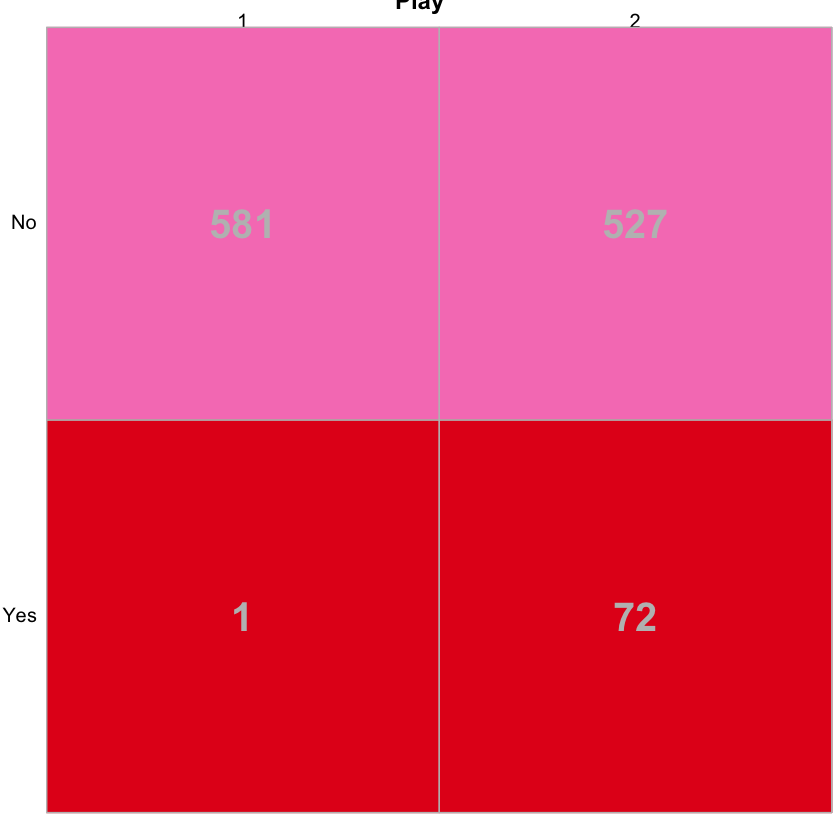

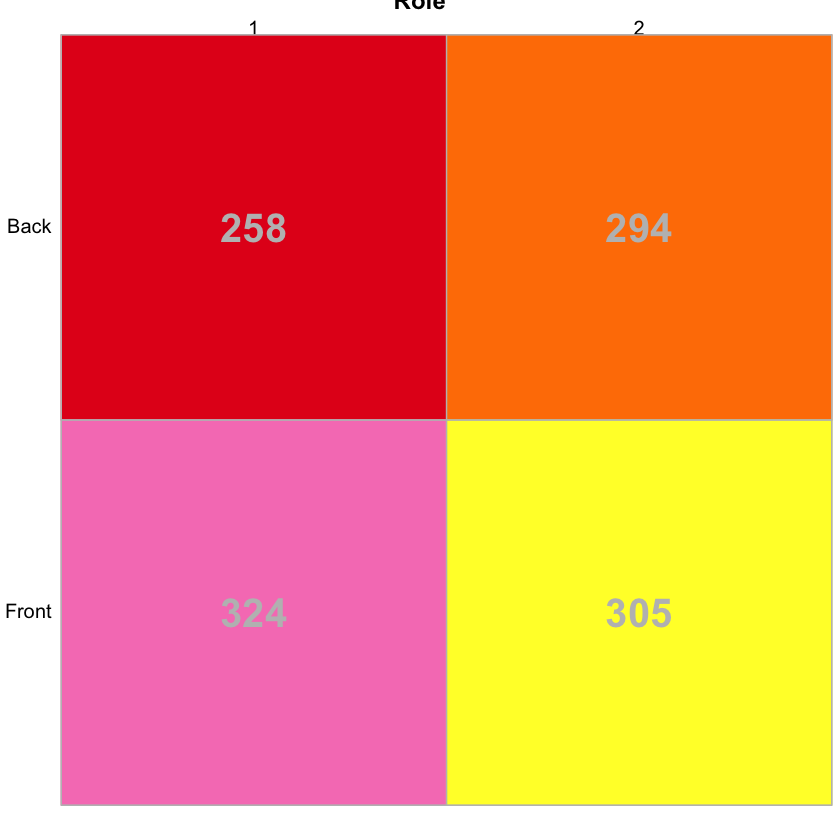

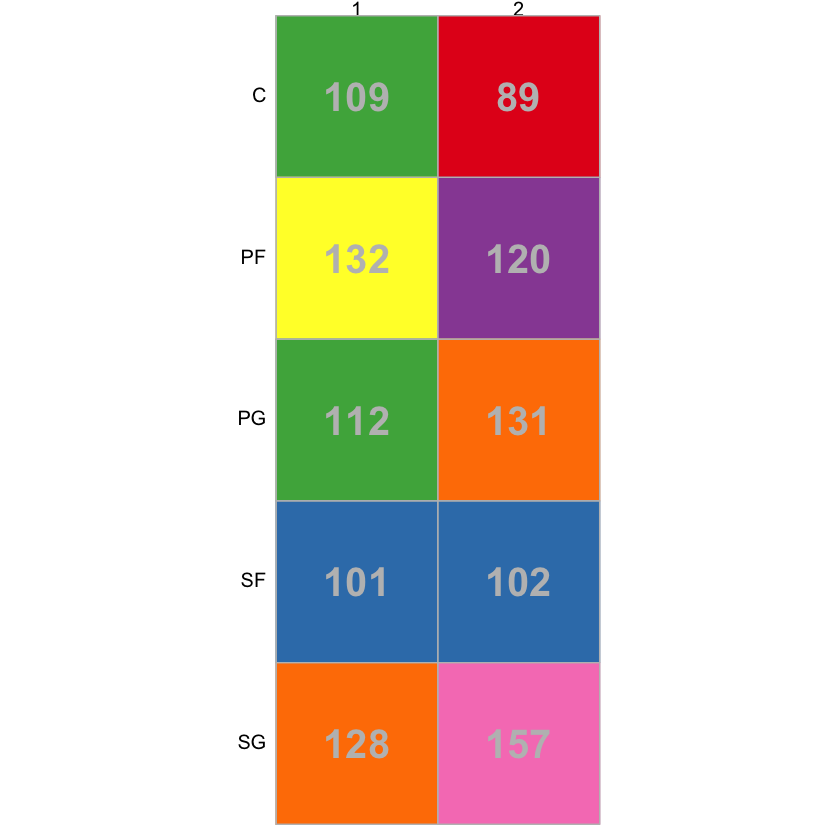

In [144]:
table(players.trans$Play, X.diana.cluster.2)
corrplot(table(players.trans$Play, X.diana.cluster.2), main = 'Play', col = brewer.pal(8, 'Set1'), is.corr = F, method = 'color', tl.srt = 0, tl.col = 'black', addgrid.col = 'grey', addCoef.col = 'grey', number.cex = 2, cl.pos = 'n')
# once again, the variable Play is the best represented by the clustering
table(players.trans$Role, X.diana.cluster.2)
table(players.trans$Pos1, X.diana.cluster.5)
corrplot(table(players.trans$Role, X.diana.cluster.2), main = 'Role', col = brewer.pal(8, 'Set1'), is.corr = F, method = 'color', tl.srt = 0, tl.col = 'black', addgrid.col = 'grey', addCoef.col = 'grey', number.cex = 2, cl.pos = 'n')
corrplot(table(players.trans$Pos1, X.diana.cluster.2), col = brewer.pal(8, 'Set1'), is.corr = F, method = 'color', tl.srt = 0, tl.col = 'black', addgrid.col = 'grey', addCoef.col = 'grey', number.cex = 2, cl.pos = 'n')


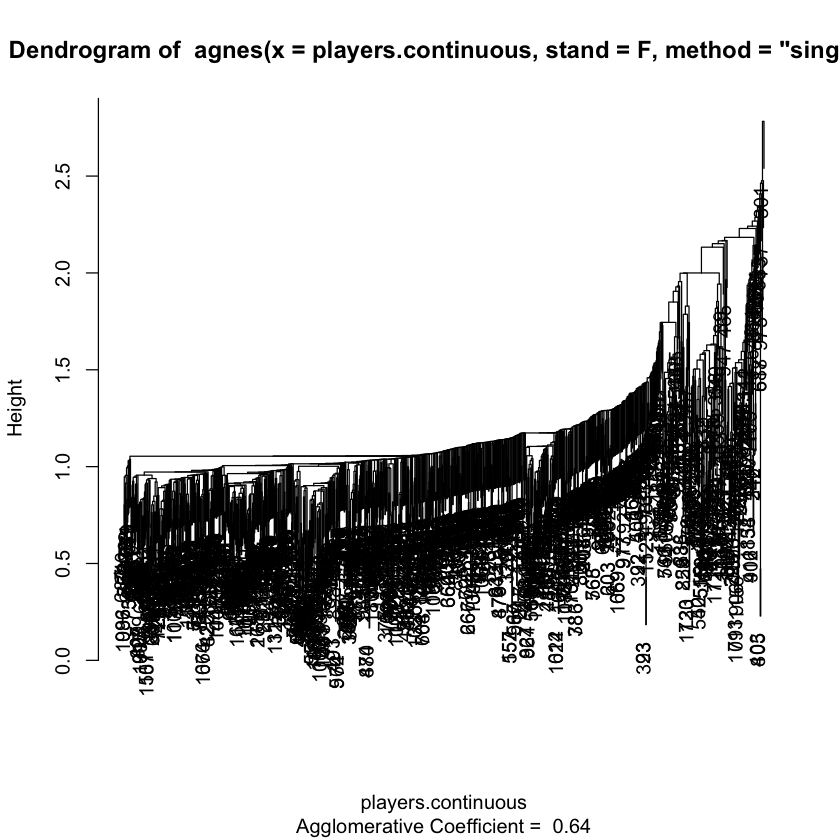

In [145]:
# agglomerative analysis with single linkage
set.seed(123)
X.agnes <- agnes(players.continuous,stand=F, method = 'single')
plot(X.agnes,which.plots=2)
X.agnes.cluster <- cutree(X.agnes,k=2)
silhouette_values <- silhouette(X.agnes.cluster, dist(players.continuous))
# single linkage suffers from the chianing effect

For k = 2 , average silhouette score of agglomerative analysis is 0.4875628 


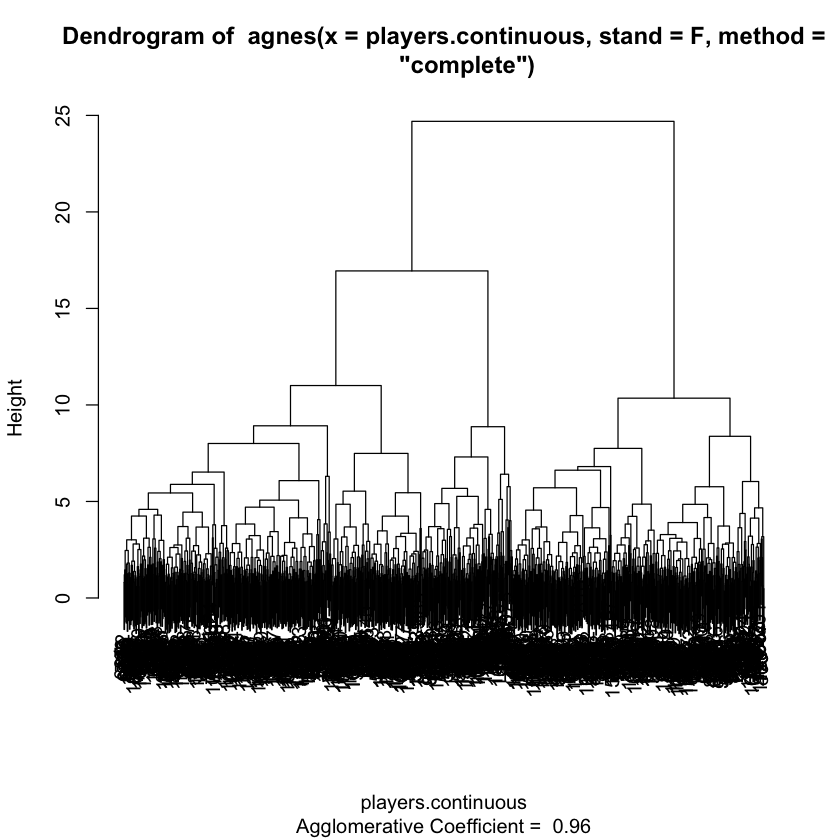

In [146]:
# complete linkage
set.seed(2)
X.agnes <- agnes(players.continuous,stand=F, method = 'complete')
plot(X.agnes,which.plots=2)
X.agnes.cluster.2 <- cutree(X.agnes,k=2)
silhouette_values <- silhouette(X.agnes.cluster.2, dist(players.continuous))
cat("For k =", 2, ", average silhouette score of agglomerative analysis is", mean(silhouette_values[, "sil_width"]), "\n")

     X.agnes.cluster.2
        1   2
  No  716 392
  Yes   1  72

       X.agnes.cluster.2
          1   2
  Back  331 221
  Front 386 243

    X.agnes.cluster.2
       1   2
  C  121  77
  PF 163  89
  PG 141 102
  SF 125  78
  SG 167 118

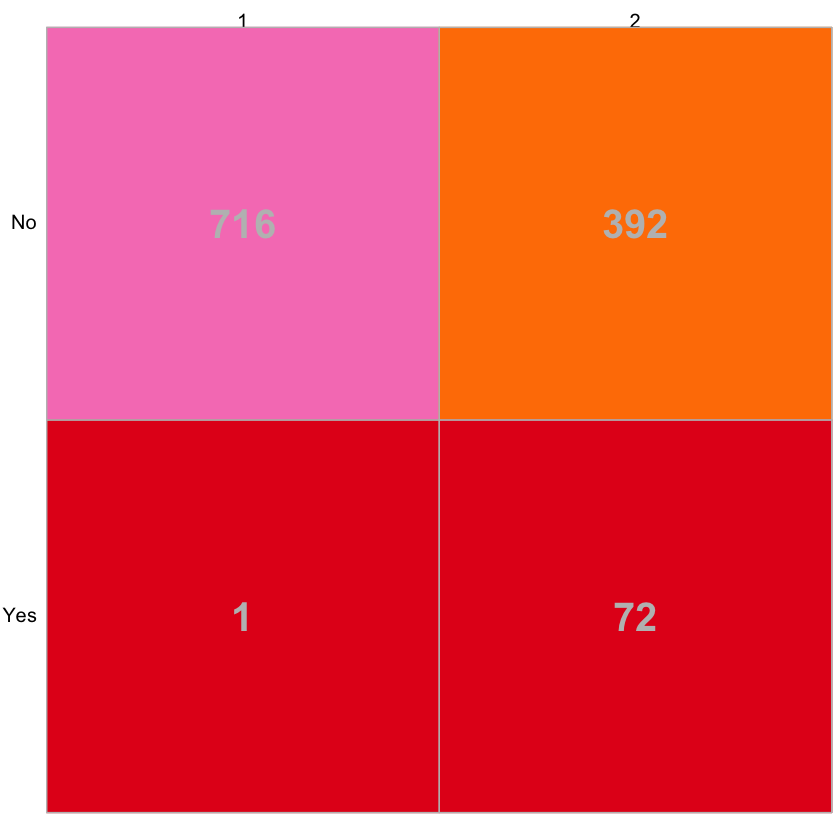

In [147]:
table(players.trans$Play, X.agnes.cluster.2)
corrplot(table(players.trans$Play, X.agnes.cluster.2), is.corr = F, col = brewer.pal(8, 'Set1'), method = 'color', tl.srt = 0, tl.col = 'black', addgrid.col = 'grey', addCoef.col = 'grey', number.cex = 2, cl.pos = 'n')
# the variable Play is the best represented by the clustering
table(players.trans$Role, X.agnes.cluster.2)
table(players.trans$Pos1, X.agnes.cluster.2)

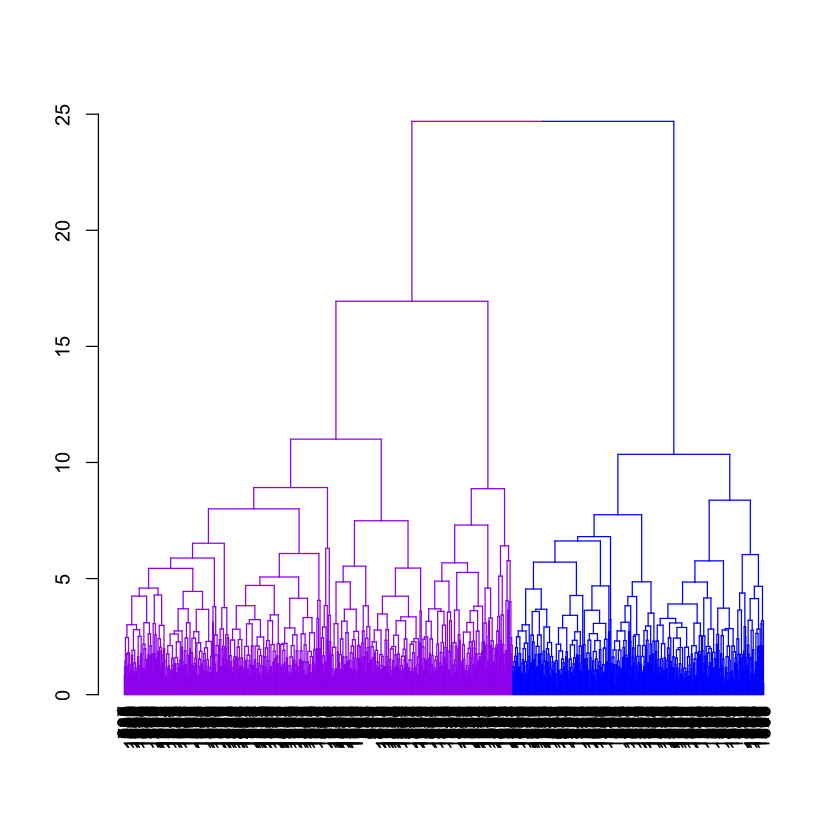

In [148]:
colors <- c('purple', 'blue')
X.agnes.dg <- as.dendrogram(X.agnes)
X.agnes.color <- color_branches(X.agnes.dg, k = 2, col = colors)
plot(X.agnes.color)

In [149]:
X.agnes.cluster <- cutree(X.agnes,k=3) # 3 clusters
silhouette_values <- silhouette(X.agnes.cluster, dist(players.continuous))
cat("For k =", 3, ", average silhouette score of agglomerative analysis is", mean(silhouette_values[, "sil_width"]), "\n")

For k = 3 , average silhouette score of agglomerative analysis is 0.4116431 


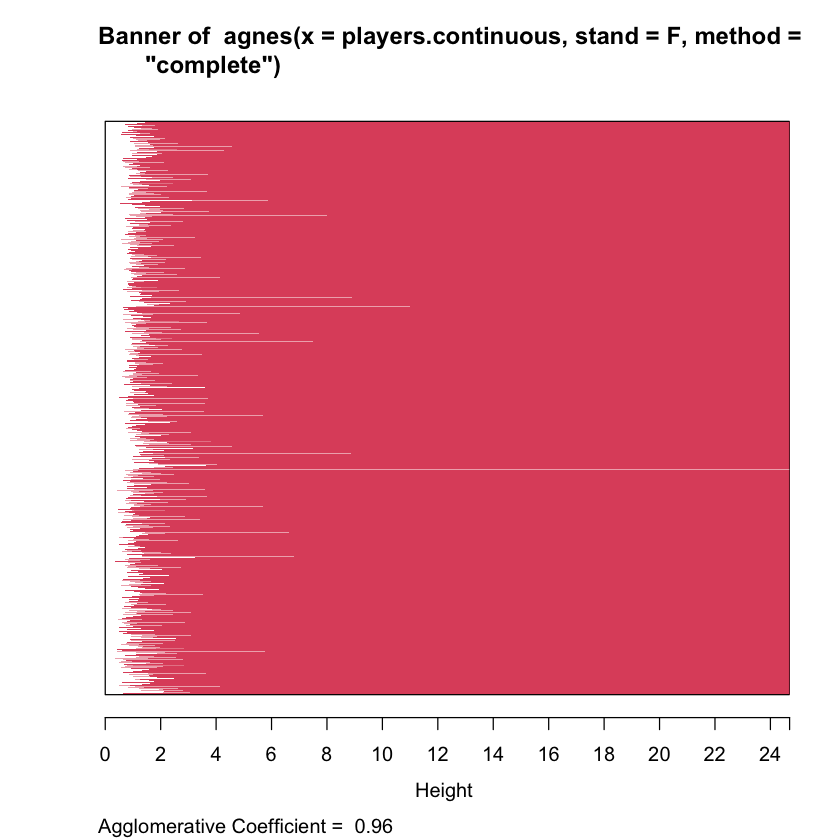

In [150]:
# visualize banner plot for agglomerative analysis with complete linkage and divisive coefficient
plot(X.agnes, which.plots = 1)

For k = 2 , average silhouette score of agglomerative analysis is 0.5006364 


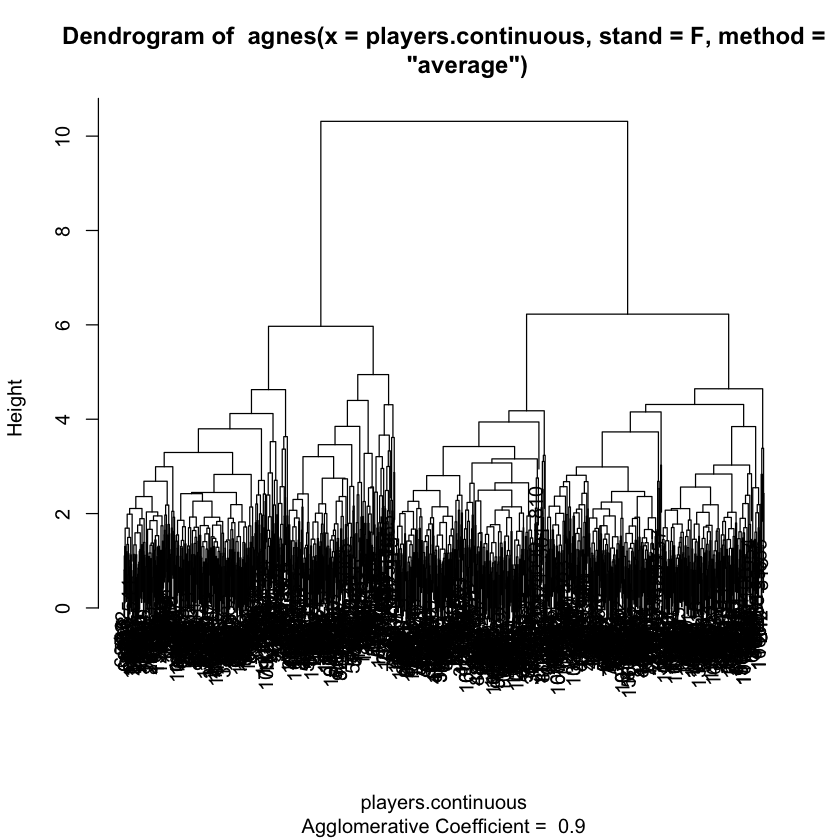

In [151]:
# average linkage
set.seed(1)
X.agnes <- agnes(players.continuous,stand=F, method = 'average')
plot(X.agnes,which.plots=2)
X.agnes.cluster <- cutree(X.agnes,k=2)
silhouette_values <- silhouette(X.agnes.cluster, dist(players.continuous))
cat("For k =", 2, ", average silhouette score of agglomerative analysis is", mean(silhouette_values[, "sil_width"]), "\n")

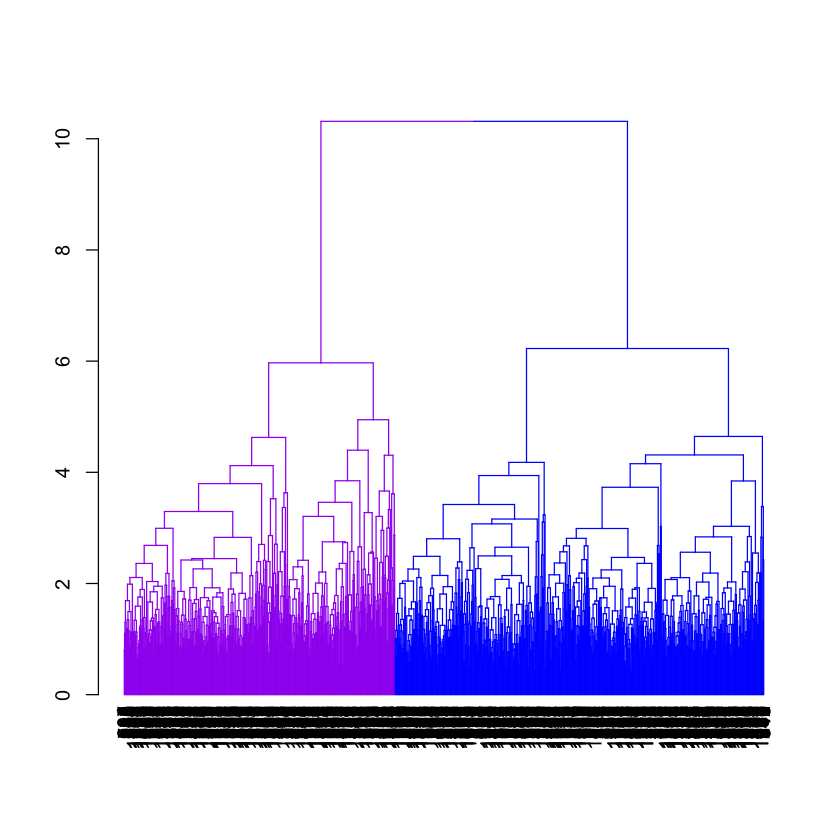

In [152]:
colors <- c('purple', 'blue') # plot by color of cluster
X.agnes.dg <- as.dendrogram(X.agnes)
X.agnes.color <- color_branches(X.agnes.dg, k = 2, col = colors)
plot(X.agnes.color)

According to the average silhouette score and agglomerative/divisive coefficient, the best choices to group instances based on hierarchical methods are divisive analysis and agglomerative analysis with complete linkage.

In [153]:
# rand index
rand.index(X.agnes.cluster.2, X.diana.cluster.2) # they agree on almost all observations

[1] 0.7973421

By comparing clustering methods with the Rand Index, we obtain that the two clustering methods agree on the partitioning for many observations.

By comparing hierarchical clustering methods with partitioning methods, it can be seen that they partition observations in similar ways.

In [154]:
# compare hierarchical with partitioning
rand.index(X.diana.cluster.2, kmeans.2$cluster) # they agree on almost everything 
rand.index(X.diana.cluster.2, kmed.2$cluster) # also strongly agree
rand.index(X.agnes.cluster.2, kmed.2$cluster) 
rand.index(X.agnes.cluster.2, kmeans.2$cluster) 

[1] 0.9966159

[1] 0.9504442

[1] 0.8378565

[1] 0.7999627

We now perform a hierarchical cluster analysis to group variables.

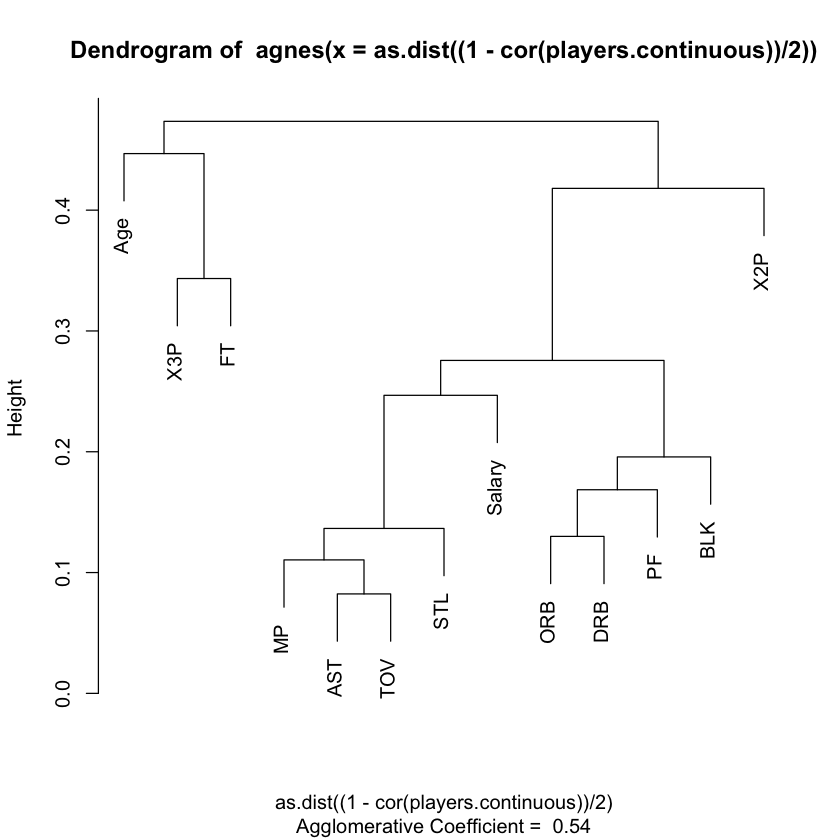

For k = 2 , average silhouette score of agglomerative analysis is 0.2189193 


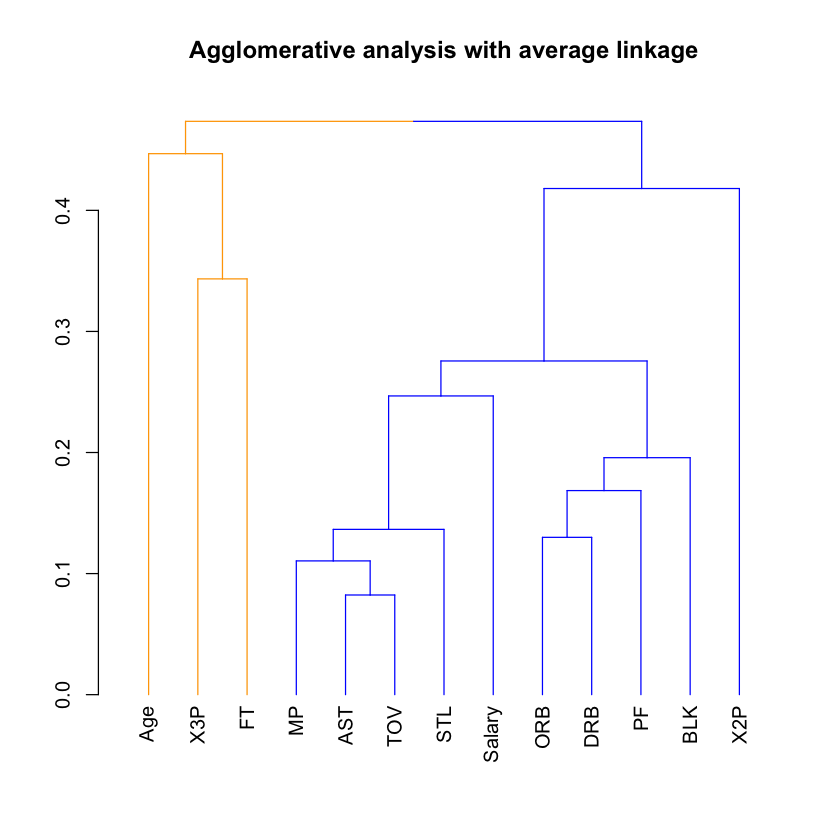

In [155]:
# Hierarchical cluster analysis on variables

# agglomerative nesting with average linkage
X.agnes.var <- agnes(as.dist((1-cor(players.continuous))/2))
plot(X.agnes.var,which.plots=2)
X.agnes.avg.2 <- cutree(X.agnes.var,k=2)
colors <- c('orange', 'blue')
X.agnes.avg.var <- as.dendrogram(X.agnes.var)
X.agnes.color.var <- color_branches(X.agnes.avg.var, k = 2, col = colors)
plot(X.agnes.color.var, main = 'Agglomerative analysis with average linkage')
silhouette_values <- silhouette(X.agnes.comp.2, dist(1-cor(players.continuous)))
cat("For k =", 2, ", average silhouette score of agglomerative analysis is", mean(silhouette_values[, "sil_width"]), "\n")

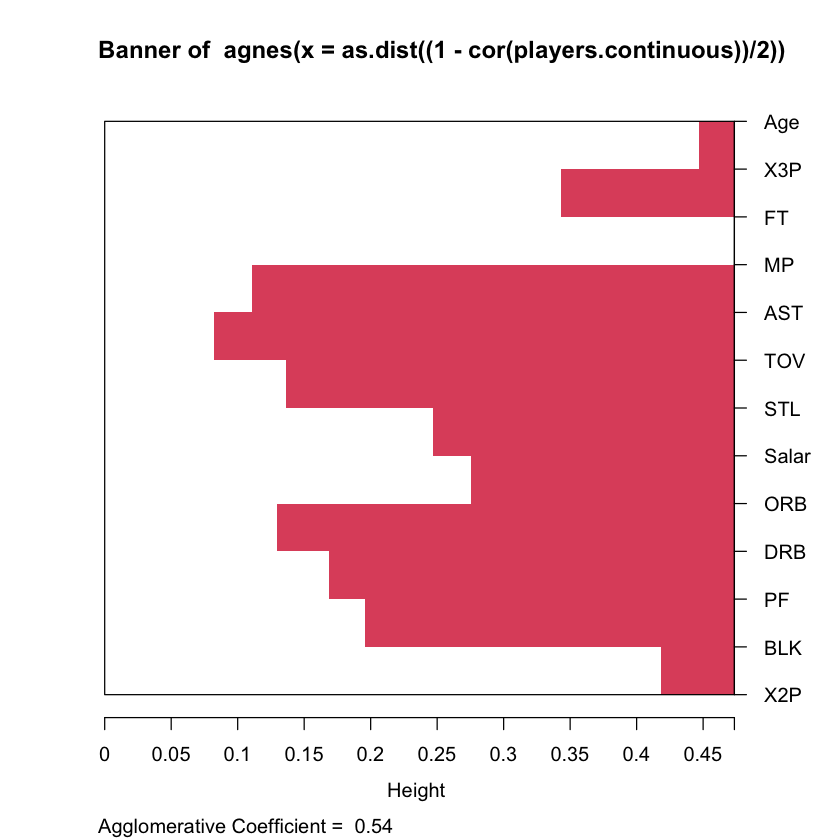

In [156]:
# banner plot for agglomerative analysis with average linkage on variables
plot(X.agnes.var, which.plots = 1)

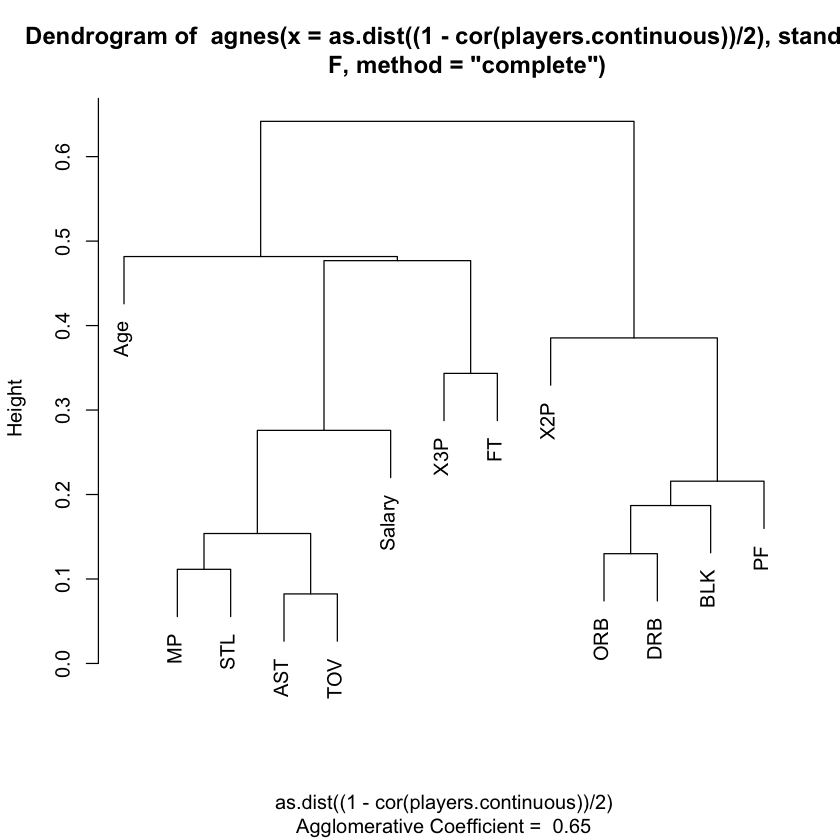

For k = 2 , average silhouette score of agglomerative analysis is 0.2189193 


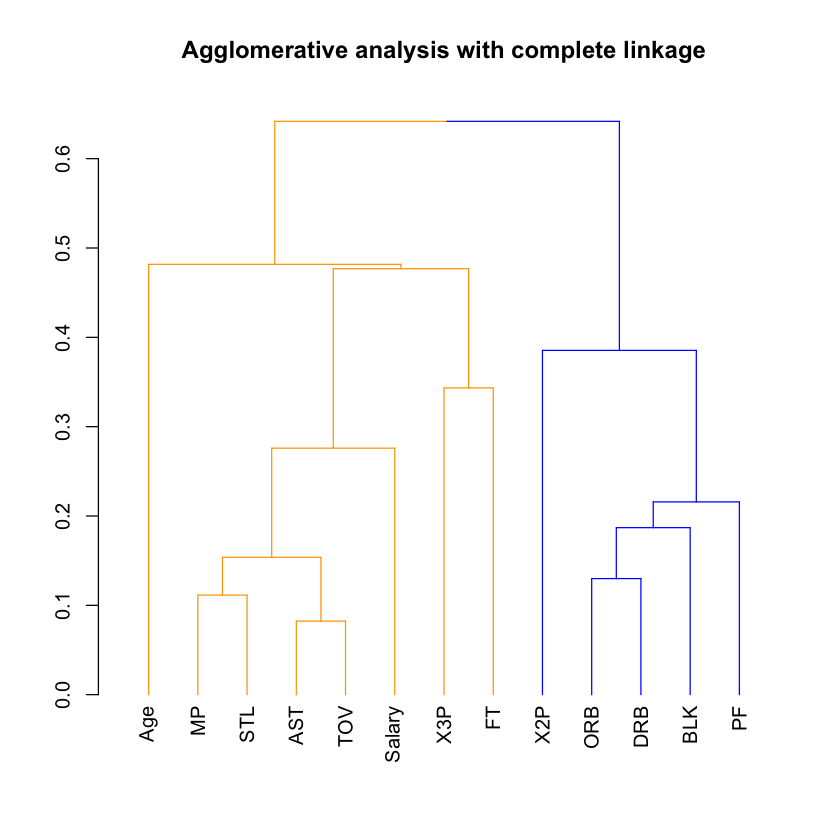

In [157]:
# complete linkage
set.seed(123)
X.agnes.var.complete<- agnes(as.dist((1-cor(players.continuous))/2),method="complete", stand = F)
plot(X.agnes.var.complete,which.plots=2)
# best partition comes from complete linkage
X.agnes.comp.2 <- cutree(X.agnes.var.complete,k=2)
colors <- c('orange', 'blue')
X.agnes.dg.var <- as.dendrogram(X.agnes.var.complete)
X.agnes.color.var <- color_branches(X.agnes.dg.var, k = 2, col = colors)
plot(X.agnes.color.var, main = 'Agglomerative analysis with complete linkage')
silhouette_values <- silhouette(X.agnes.comp.2, dist(1-cor(players.continuous)))
cat("For k =", 2, ", average silhouette score of agglomerative analysis is", mean(silhouette_values[, "sil_width"]), "\n")

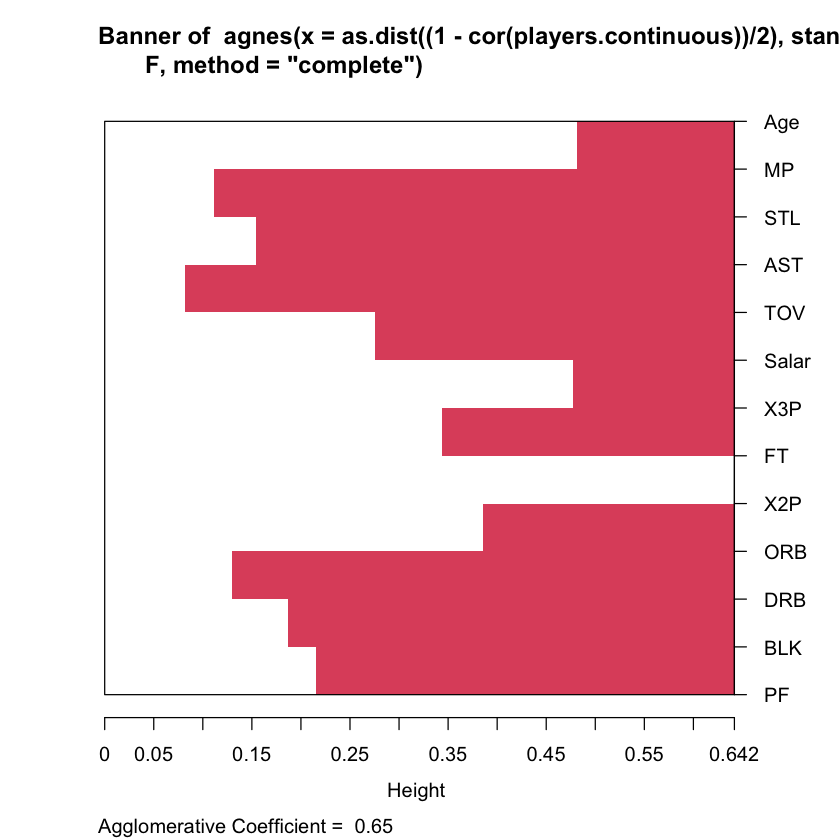

In [158]:
# banner plot for agglomerative analysis with complete linkage on variables
plot(X.agnes.var.complete, which.plots = 1)

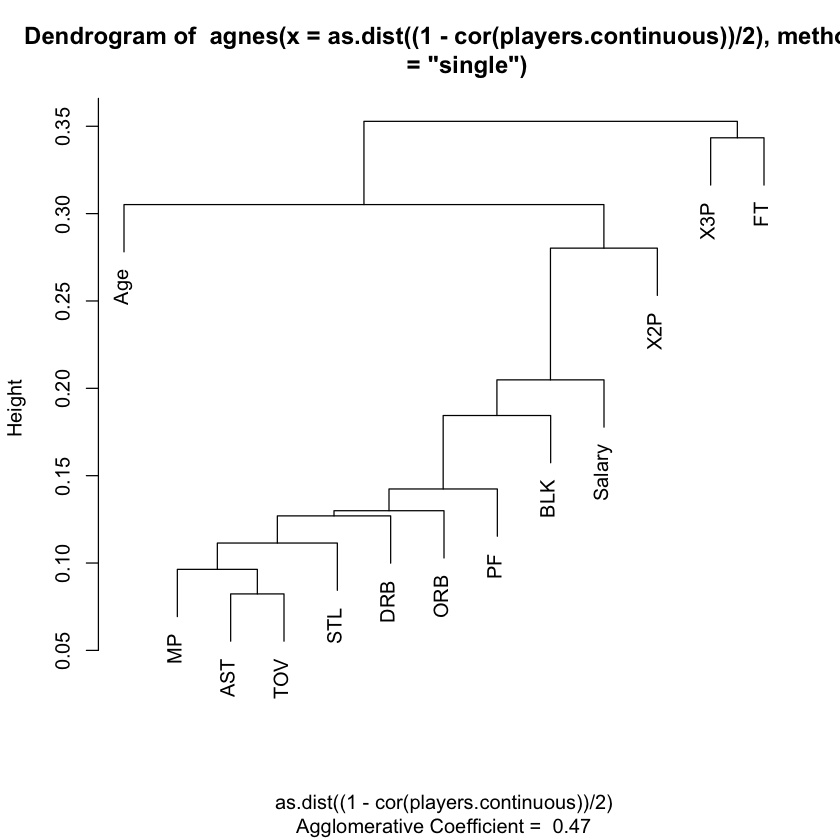

In [159]:
# single linkage
X.agnes.var.single<- agnes(as.dist((1-cor(players.continuous))/2),method="single")
plot(X.agnes.var.single,which.plots=2)
# agglomerative clustering wiht single linkage suffers by the chaining effect

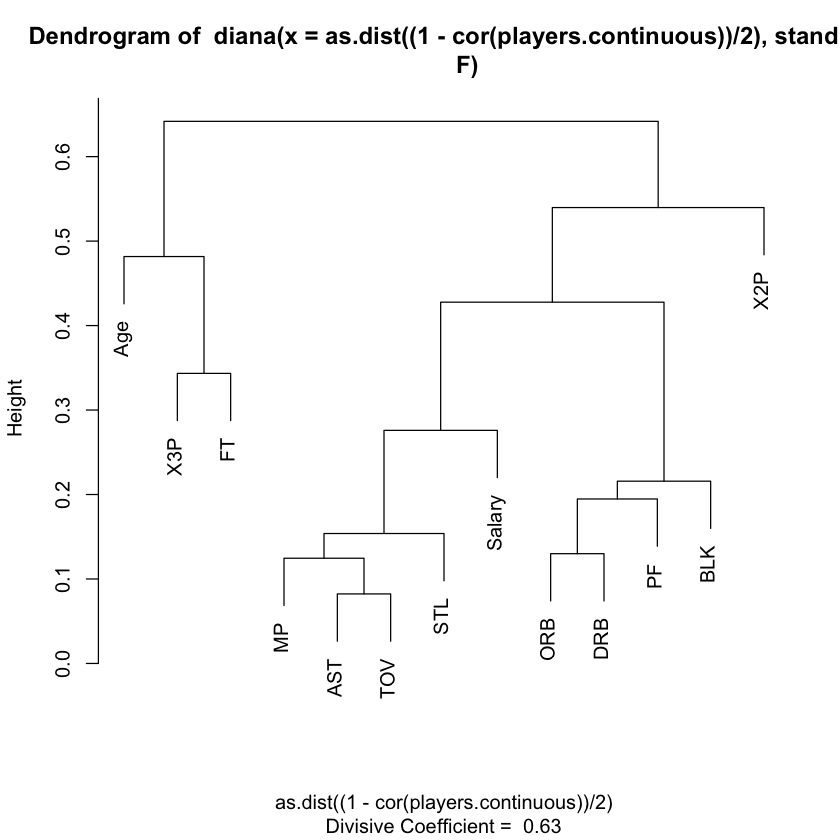

For k = 2 , average silhouette score of divisive analysis is 0.4112418 


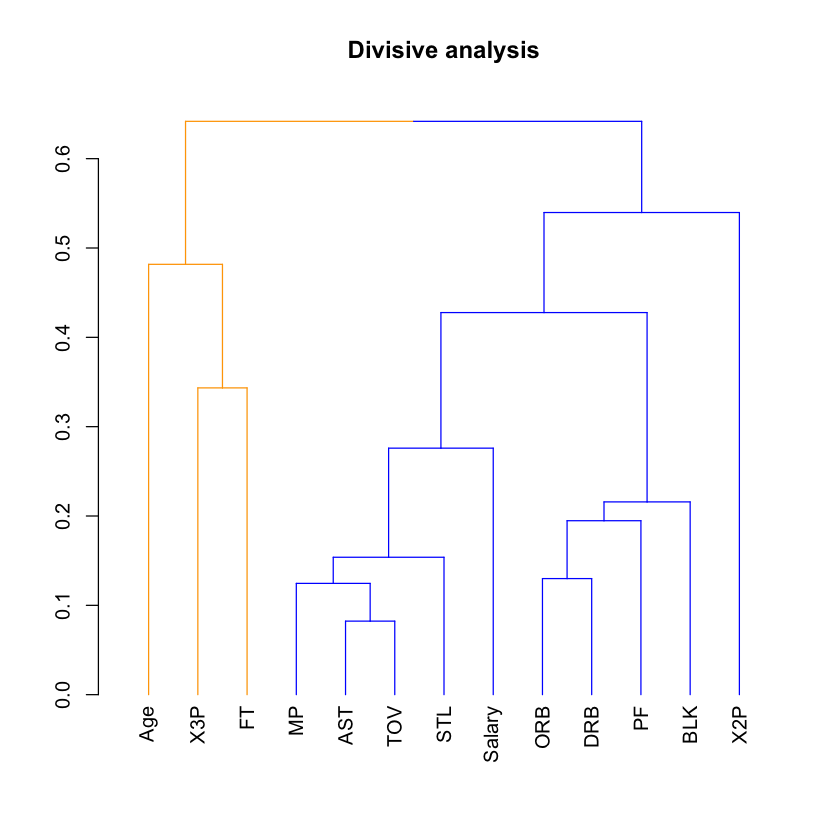

In [160]:
# divisive analysis
set.seed(123)
X.diana.var <- diana(as.dist((1-cor(players.continuous))/2), stand = F)
plot(X.diana.var,which.plots=2)
X.diana.var.2 <- cutree(X.diana.var,k=2)
colors <- c('orange', 'blue')
X.diana.dg.var <- as.dendrogram(X.diana.var)
X.diana.color.var <- color_branches(X.diana.dg.var, k = 2, col = colors)
plot(X.diana.color.var, main = 'Divisive analysis')
silhouette_values <- silhouette(X.diana.var.2, dist(1-cor(players.continuous)))
cat("For k =", 2, ", average silhouette score of divisive analysis is", mean(silhouette_values[, "sil_width"]), "\n")
# very similar to average linkage in agglomerative analysis 

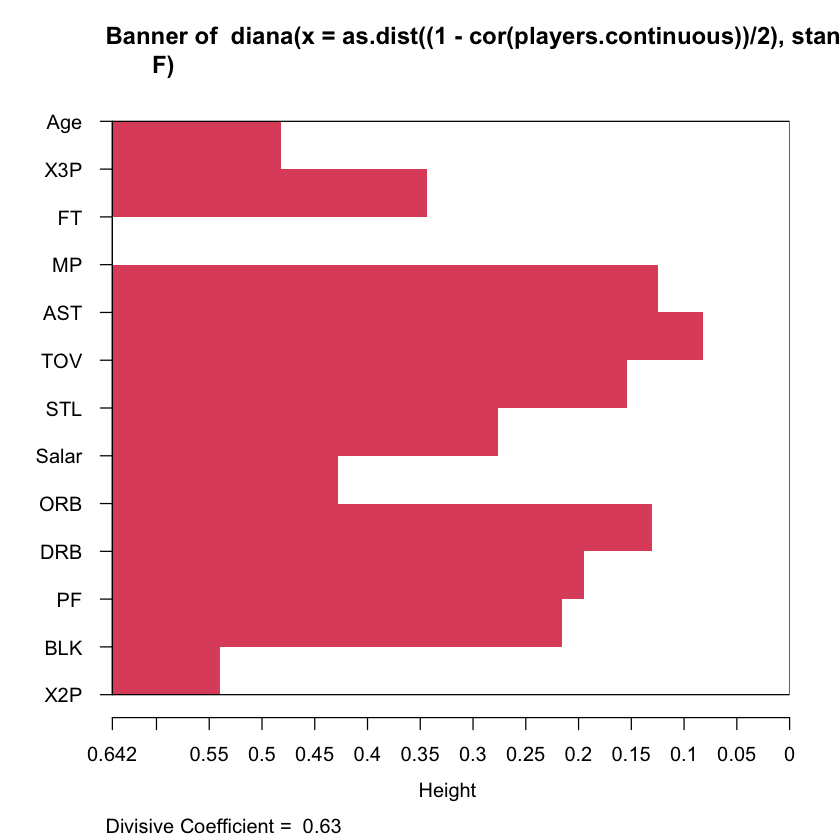

In [161]:
# banner plot for divisive analysis
plot(X.diana.var, which.plots = 1)

In [162]:
# rand index
rand.index(X.diana.var.2, X.agnes.avg.2)

[1] 1

According to both divisive analysis and agglomerative analysis with average linkage, it makes sense to divide variables in two groups.
Divisive analysis and agglomerative analysis with average linkage partition the variables in the same way, as can be seen by the Rand Index.

By plotting a heatmap with the hierarchical clustering of the variables and the hierarchical clustering of the observations, we obtain a heatmap, where two groups can be seen for the variables and two groups for the instances. By comparing the variables which belong to the first group (yellow) and the second group (blue), following the partition of hierarchical cluster analysis, to the correlation matrix previously obtained, we can observe that the three variables which are clustered in the first group are the ones which are less correlated to the others, namely Age, X3P and FT. Furthermore, the variable X2P, which is also uncorrelated from other variables, is grouped further away from other variables in the same group.

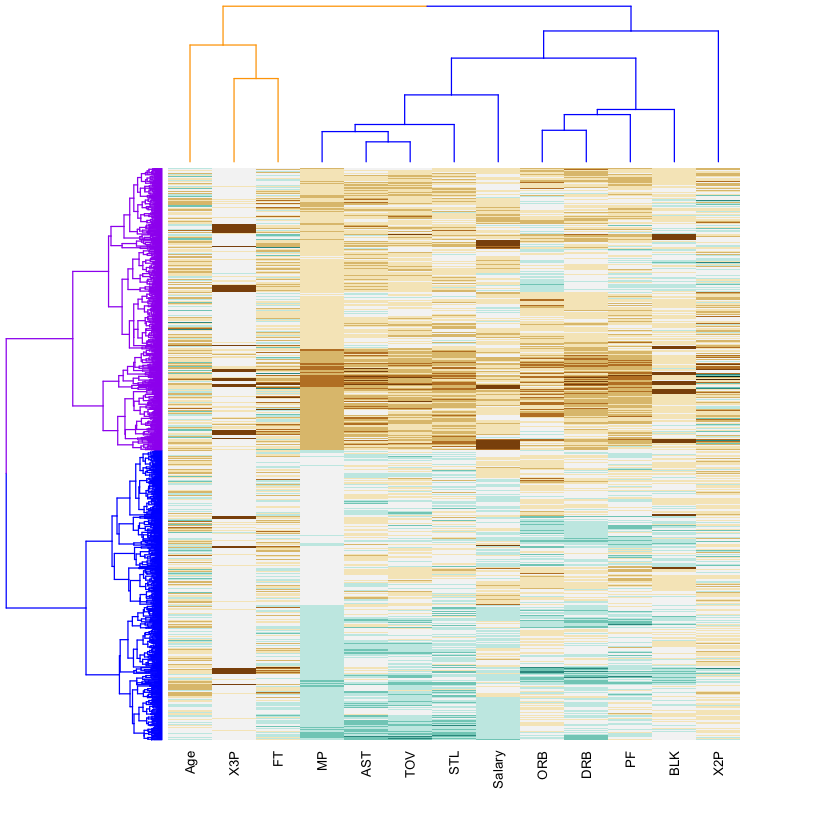

In [163]:
# Heatmap
library(RColorBrewer)
heatmap(data.matrix(players.continuous), Rowv = X.diana.color, Colv = X.diana.color.var, scale = 'column', col = brewer.pal(11, 'BrBG'),
        revC = T, cexCol = 0.8, labRow = '') 